Importing Libraries

In [319]:
import matplotlib.pyplot as plt # visualization
import missingno as msno # missing data visualization
import numpy as np # array manipulation
import pandas as pd # dataframe manipulation
import scipy # statistical tests
import seaborn as sns # visualization
from zipfile import ZipFile # reading zip file

# statsmodels for doing stats
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf, pacf

# sktime for time series imputation
from sktime.transformations.series.impute import Imputer

# sklearn for modeling
from sklearn.base import RegressorMixin
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

# xgboost for boosting
from xgboost import XGBRegressor


Declaring Global Variable

In [111]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

Loading Data

In [112]:
zip_file = ZipFile('dataset/train.csv.zip')
raw_df = pd.read_csv(zip_file.open('train.csv'))

Understanding Data

In [113]:
def display_all_columns(df: pd.DataFrame):
    with pd.option_context('display.max_columns', None): 
        display(df)

In [114]:
display_all_columns(raw_df.head())

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,Ret_12,Ret_13,Ret_14,Ret_15,Ret_16,Ret_17,Ret_18,Ret_19,Ret_20,Ret_21,Ret_22,Ret_23,Ret_24,Ret_25,Ret_26,Ret_27,Ret_28,Ret_29,Ret_30,Ret_31,Ret_32,Ret_33,Ret_34,Ret_35,Ret_36,Ret_37,Ret_38,Ret_39,Ret_40,Ret_41,Ret_42,Ret_43,Ret_44,Ret_45,Ret_46,Ret_47,Ret_48,Ret_49,Ret_50,Ret_51,Ret_52,Ret_53,Ret_54,Ret_55,Ret_56,Ret_57,Ret_58,Ret_59,Ret_60,Ret_61,Ret_62,Ret_63,Ret_64,Ret_65,Ret_66,Ret_67,Ret_68,Ret_69,Ret_70,Ret_71,Ret_72,Ret_73,Ret_74,Ret_75,Ret_76,Ret_77,Ret_78,Ret_79,Ret_80,Ret_81,Ret_82,Ret_83,Ret_84,Ret_85,Ret_86,Ret_87,Ret_88,Ret_89,Ret_90,Ret_91,Ret_92,Ret_93,Ret_94,Ret_95,Ret_96,Ret_97,Ret_98,Ret_99,Ret_100,Ret_101,Ret_102,Ret_103,Ret_104,Ret_105,Ret_106,Ret_107,Ret_108,Ret_109,Ret_110,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120,Ret_121,Ret_122,Ret_123,Ret_124,Ret_125,Ret_126,Ret_127,Ret_128,Ret_129,Ret_130,Ret_131,Ret_132,Ret_133,Ret_134,Ret_135,Ret_136,Ret_137,Ret_138,Ret_139,Ret_140,Ret_141,Ret_142,Ret_143,Ret_144,Ret_145,Ret_146,Ret_147,Ret_148,Ret_149,Ret_150,Ret_151,Ret_152,Ret_153,Ret_154,Ret_155,Ret_156,Ret_157,Ret_158,Ret_159,Ret_160,Ret_161,Ret_162,Ret_163,Ret_164,Ret_165,Ret_166,Ret_167,Ret_168,Ret_169,Ret_170,Ret_171,Ret_172,Ret_173,Ret_174,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,NaN,NaN,NaN,NaN,8.0,NaN,75751,0.2254,11.0,NaN,NaN,0.49,5.0,1.842984,27.053679,1.0,NaN,NaN,-0.925463,2.0,NaN,-0.489492,NaN,NaN,NaN,0.055275,-0.010770,0.000003,-0.000734,-0.000738,-0.000007,0.000423,0.000438,-0.000076,0.000645,-0.000006,0.000006,NaN,-0.000156,NaN,NaN,-0.000430,-1.964625e-05,0.000002,-0.000031,NaN,NaN,-7.539950e-06,NaN,0.000416,-0.000164,-0.000009,-0.000438,NaN,0.000010,-7.176461e-04,-0.000162,NaN,NaN,NaN,-0.000582,0.001003,-0.000010,0.000134,0.000014,-0.000142,-0.001003,-0.000007,-0.000005,-1.277039e-05,NaN,0.000706,-0.000734,-7.311366e-04,-0.001996,-0.000153,0.000133,NaN,NaN,-0.000007,0.000713,0.000009,NaN,-0.000432,-0.001152,-0.000723,9.982299e-07,-0.003579,0.000435,-0.000012,-0.000132,0.000004,0.000418,-0.000011,NaN,-0.002724,-0.002996,0.000129,0.000012,-0.000002,-1.369941e-04,-0.003537,-0.000142,0.000135,0.000020,-1.318606e-04,0.000449,-0.000008,0.000006,0.000282,-1.390130e-04,-1.284489e-04,0.000005,-0.000005,-1.693501e-03,-0.002141,0.000003,-0.000274,-0.000015,0.001279,0.000282,-0.000003,-0.000156,0.000024,-0.000560,-0.000580,0.000138,-0.002277,0.000125,0.000406,-0.000427,-0.000013,-0.000843,1.666111e-04,0.000569,0.000695,NaN,0.000700,-0.000843,0.000268,-0.000415,-0.001133,0.000004,-0.000137,-0.000009,1.340780e-04,-0.000137,-0.000565,-0.000704,-0.005605,0.000826,0.001966,0.002676,0.000422,-0.000428,-0.000539,-0.002113,-0.001400,-0.000017,-0.002801,-0.000003,0.002099,0.000698,0.000547,-0.001976,0.000012,0.001112,0.000284,0.000003,-0.001976,-0.000842,-0.001390,0.000148,2.846942e-04,0.001254,-0.000130,0.000126,0.000978,0.000151,0.002642,-0.000017,0.000140,0.000015,-0.000011,0.001683,-0.000286,0.000010,0.000152,0.000579,-1.501973e-04,0.000822,0.001392,0.000292,0.000002,0.001133,-0.000134,0.001539,-0.000142,0.000861,0.000544,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,2,NaN,NaN,NaN,NaN,3.0,0.388896,17369,0.0166,13.0,NaN,-0.409923,0.71,9.0,1.577586,9.546915,1.0,-0.949891,0.917958,-0.897067,9.0,0.886205,-0.151805,1.239856,0.953424,-0.709462,0.009748,0.002987,-0.000487,0.000475,0.000002,-0.000002,-0.000523,-0.000255,-0.000008,0.000048,-0.000312,-0.000742,-0.000009,-0.000248,0.000487,0.000256,-0.000508,2.495416e-04,0.000015,0.000008,-0.000251,-0.000519,-5.029784e-04,0.000240,0.000248,0.000495,-0.000243,-0.

In [115]:
raw_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 211 columns):
 #    Column           Dtype  
---   ------           -----  
 0    Id               int64  
 1    Feature_1        float64
 2    Feature_2        float64
 3    Feature_3        float64
 4    Feature_4        float64
 5    Feature_5        float64
 6    Feature_6        float64
 7    Feature_7        int64  
 8    Feature_8        float64
 9    Feature_9        float64
 10   Feature_10       float64
 11   Feature_11       float64
 12   Feature_12       float64
 13   Feature_13       float64
 14   Feature_14       float64
 15   Feature_15       float64
 16   Feature_16       float64
 17   Feature_17       float64
 18   Feature_18       float64
 19   Feature_19       float64
 20   Feature_20       float64
 21   Feature_21       float64
 22   Feature_22       float64
 23   Feature_23       float64
 24   Feature_24       float64
 25   Feature_25       float64
 26   Ret_MinusTwo    

In [116]:
raw_df["Weight_Intraday"].isna().sum()

np.int64(0)

In [117]:
raw_df["Weight_Daily"].isna().sum()

np.int64(0)

There are no missing weights, so we can proceed with sampling. Since Ret_PlusOne and Ret_PlusTwo are not in a moving time window format (and are not provided), we don't need to account for time dependencies between rows.



In [118]:
test_df = raw_df.sample(frac=0.2, random_state=RANDOM_STATE).sort_index()
test_df.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
1,2,NaN,NaN,NaN,NaN,3.0,0.388896,17369,0.0166,13.0,...,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1.733950e+06,2.167438e+06
4,5,6.0,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,...,-0.001235,0.000027,0.002449,8.619882e-06,0.001209,-0.000004,0.036104,-0.026552,1.267270e+06,1.584088e+06
7,8,NaN,2.582955,0.157344,0.617261,8.0,-0.177333,92214,0.2119,8.0,...,-0.000247,-0.000250,0.000010,1.620296e-05,0.000245,0.000006,0.020268,-0.059093,1.349917e+06,1.687396e+06
13,14,NaN,0.480362,0.915407,1.381156,7.0,0.223401,35023,0.2138,10.0,...,0.000295,-0.001858,0.001133,-1.288622e-03,-0.000433,-0.000574,-0.010936,-0.019700,1.460081e+06,1.825101e+06
23,24,NaN,-1.833909,0.807421,0.396305,7.0,0.225614,57773,0.2986,7.0,...,0.000663,-0.003362,-0.002676,2.674716e-03,0.002692,-0.003376,0.076162,0.013566,1.208516e+06,1.510645e+06


In [119]:
test_df.tail()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
39973,39974,NaN,NaN,0.247709,0.708384,1.0,0.516685,39562,0.3318,12.0,...,-0.000635,0.000625,0.000010,0.000950,1.271857e-05,-2.605154e-07,0.016990,0.000616,1.518609e+06,1.898261e+06
39974,39975,NaN,-0.795393,0.812479,1.182253,2.0,0.435337,34124,0.3650,10.0,...,-0.001339,0.000944,0.000387,0.000577,-2.094398e-06,1.228960e-05,0.008246,-0.025444,1.467096e+06,1.833870e+06
39977,39978,NaN,1.584213,1.485364,NaN,5.0,0.181444,48365,0.2119,11.0,...,0.000376,-0.000660,0.000392,-0.000129,-3.927012e-04,3.845017e-04,0.001195,-0.001933,1.813249e+06,2.266561e+06
39986,39987,NaN,-1.304033,1.063957,0.448434,9.0,0.276835,34425,0.2208,11.0,...,0.000003,-0.000210,0.000007,0.000195,2.002236e-04,-1.097263e-04,-0.030169,0.001835,1.388133e+06,1.735166e+06
39992,39993,NaN,-0.787167,1.189032,0.168022,10.0,0.187430,82639,0.0142,8.0,...,0.000223,-0.000005,0.000857,-0.000183,-9.980441e-07,-5.580793e-06,0.002926,0.005249,1.411322e+06,1.764153e+06


In [120]:
test_df.shape

(8000, 211)

Removing the data points from raw data, that are in the test set to create training set.

In [121]:
train_df = raw_df[~raw_df["Id"].isin(test_df["Id"])]
train_df.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,NaN,NaN,NaN,NaN,8.0,NaN,75751,0.2254,11.0,...,-0.002688,0.002246,-0.000838,-0.000695,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
2,3,NaN,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,...,-0.000524,-0.000394,0.000116,0.000532,0.000274,0.000784,-0.024791,0.015711,1.529197e+06,1.911497e+06
3,4,NaN,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,...,0.000346,-0.000090,0.000288,-0.000128,0.000074,0.000341,-0.005680,-0.002190,1.711569e+06,2.139462e+06
5,6,NaN,NaN,-0.680515,NaN,1.0,0.227034,24099,0.2064,8.0,...,0.000242,0.001412,0.001880,-0.000946,0.000471,0.001193,0.031098,-0.006551,1.431110e+06,1.788888e+06
6,7,NaN,-0.230636,-0.227021,-0.084126,7.0,-0.095007,39351,0.3650,13.0,...,0.000326,-0.000408,0.000086,-0.000012,-0.000006,0.000640,-0.011105,-0.030745,1.719166e+06,2.148958e+06


In [122]:
train_df.tail()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
39995,39996,NaN,NaN,0.822371,NaN,1.0,2.182050,23729,0.2208,12.0,...,0.000623,0.000504,1.490012e-03,0.000623,-0.000516,-0.000876,-0.024270,0.010143,1.413891e+06,1.767363e+06
39996,39997,NaN,0.747556,-0.489418,-0.267193,10.0,-0.454329,56222,0.2323,8.0,...,0.000649,0.001290,-6.031396e-07,-0.001278,-0.000658,0.000628,0.017855,-0.000094,1.468998e+06,1.836248e+06
39997,39998,NaN,NaN,-0.914701,-1.013004,2.0,-0.701013,7024,0.3418,10.0,...,0.001375,0.000005,7.888841e-04,0.000211,-0.000573,-0.001568,0.011602,-0.006539,1.812824e+06,2.266030e+06
39998,39999,NaN,-0.021457,1.021284,NaN,3.0,1.092849,27376,0.2119,13.0,...,0.000273,0.000017,2.471045e-04,-0.000138,0.000015,-0.000123,-0.018877,-0.011572,1.507918e+06,1.884897e+06
39999,40000,NaN,1.093868,-0.677391,-0.604479,7.0,NaN,4141,0.2254,NaN,...,-0.000914,-0.002752,1.350722e-03,0.000903,0.003667,0.002761,0.024405,-0.024345,1.535389e+06,1.919237e+06


In [123]:
train_df.shape

(32000, 211)

# Exploratory Data Analysis
Making list of columns by types.

In [124]:
feature_cols = [f"Feature_{i}" for i in range(1, 26)]
intra_ret_feat_cols = [f"Ret_{i}" for i in range(2, 121)]
intra_ret_target_cols = [f"Ret_{i}" for i in range(121, 181)]
intra_ret_cols = intra_ret_feat_cols + intra_ret_target_cols
inter_ret_feat_cols = ["Ret_MinusTwo", "Ret_MinusOne"]
inter_ret_target_cols = ["Ret_PlusOne", "Ret_PlusTwo"]
inter_ret_cols = inter_ret_feat_cols + inter_ret_target_cols

## Finding the missing data

In [198]:
def plot_missing(df: pd.DataFrame, name: str):
    nrows, ncols = df.shape
    notna_df = df.notna().sum().to_frame().T
    percent_notna_df = (notna_df / nrows) * 100
    fig, ax = plt.subplots(1, 1, figsize=(7, ncols * 0.25))
    sns.barplot(percent_notna_df, orient="h", ax=ax)
    ax.set_xlim(0, 110)
    ax.bar_label(ax.containers[0], fmt="%.2f");
    ax.set_title(f"Percentage of Non Null Values in {name}")
    ax.set_xlabel("%")
    ax.set_ylabel("Column")

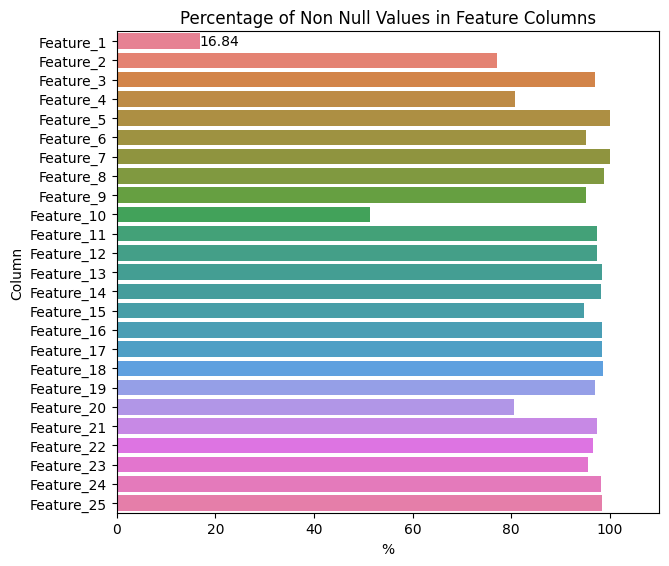

In [199]:
plot_missing(train_df.loc[:, feature_cols], "Feature Columns")

Most of the feature columns have high data availability, with less than 10% missing values. However, a few columns like Feature_2, Feature_4, and Feature_20 have moderate availability, with around 80% of their data present. On the other hand, some features show low data availability — notably, Feature_10 has approximately 50% of its data, while Feature_1 has only 16.84% available.

Visualising the percentage of non-null (i.e., present) values for each feature column in the training dataset.

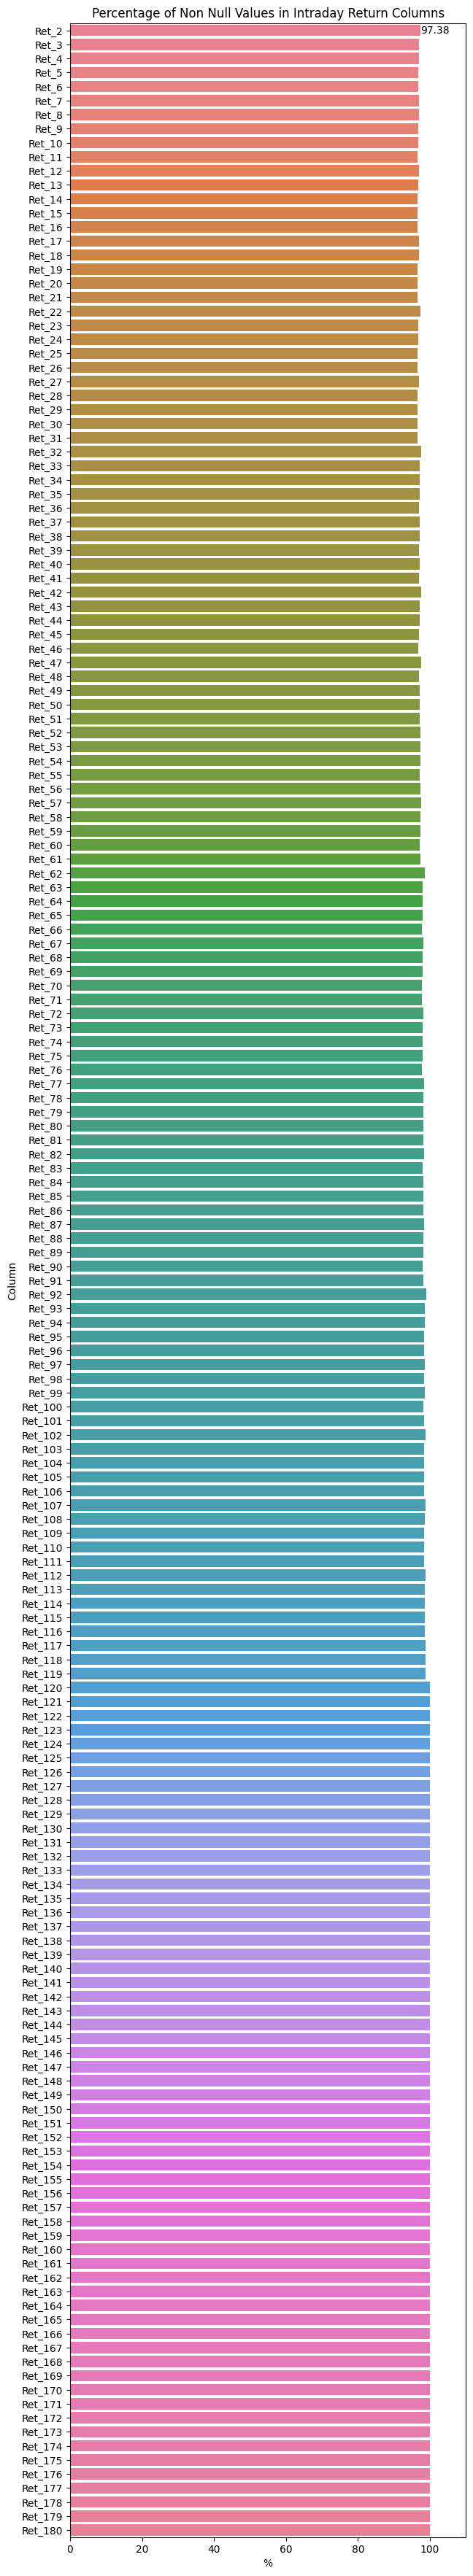

In [200]:
plot_missing(train_df.loc[:, intra_ret_cols], "Intraday Return Columns")

Ploting a matrix visualization of missing values across the selected intra-day return columns.

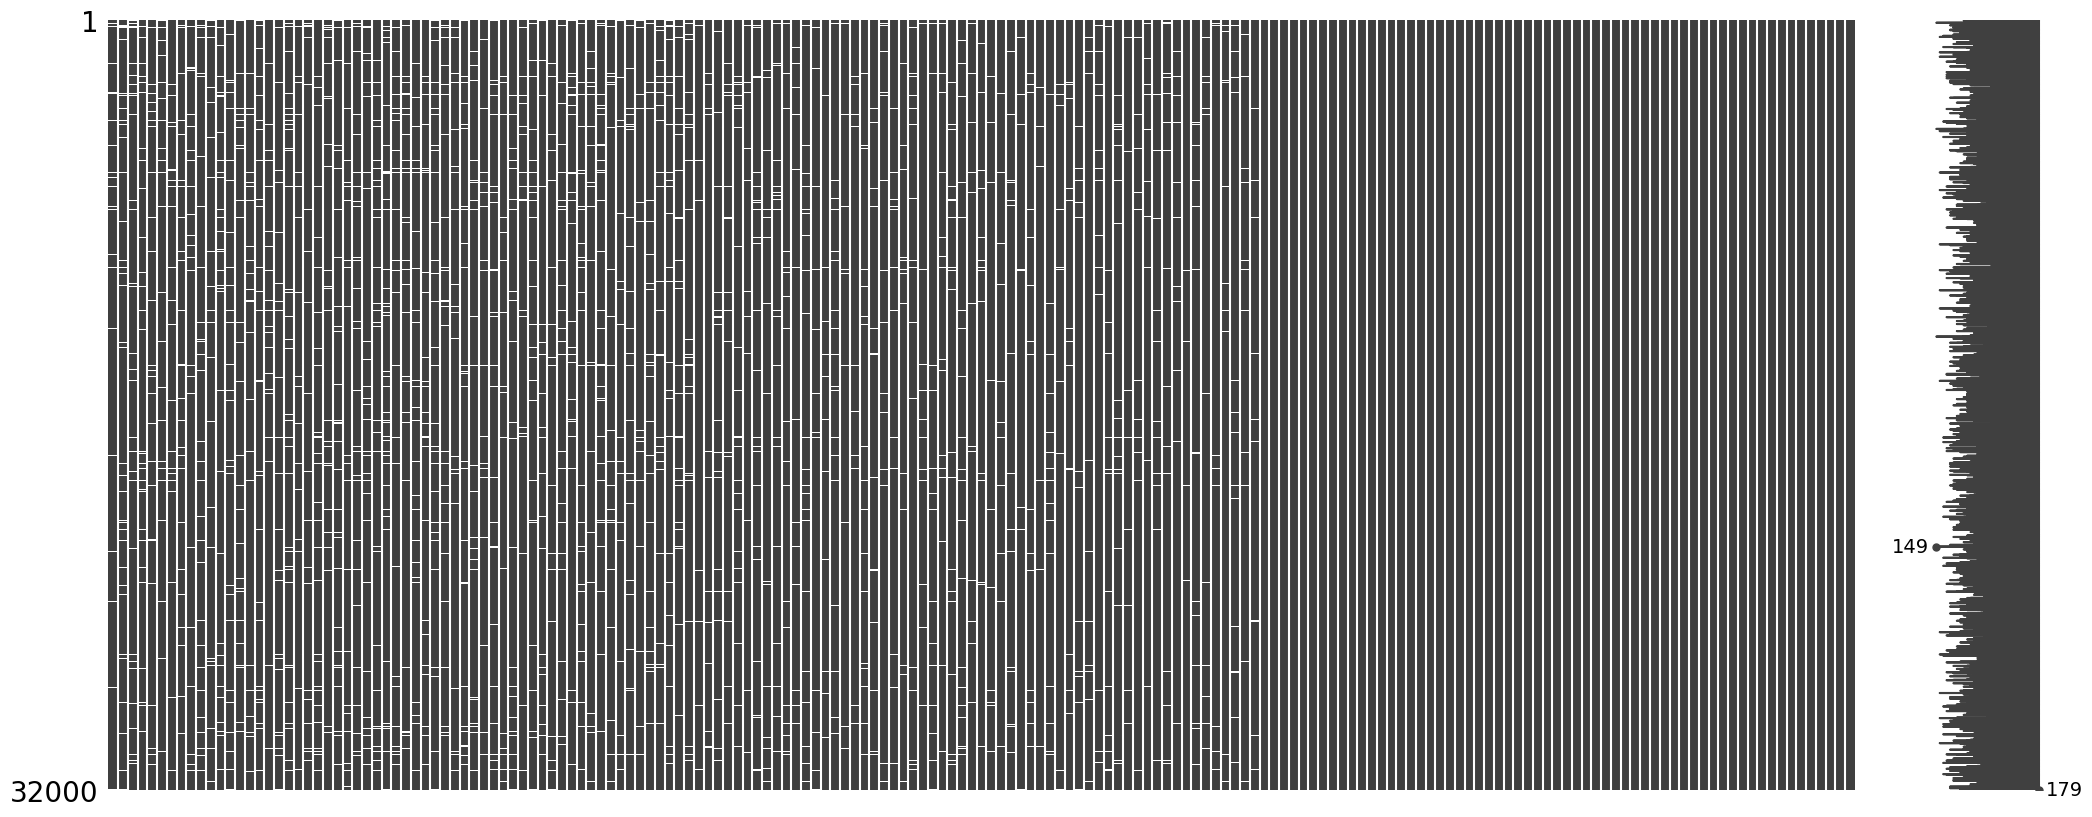

In [201]:
msno.matrix(train_df.loc[:, intra_ret_cols]);

The intraday return data is nearly complete, with each column having over 96% non-missing values. Since missing values in time series can often be imputed using methods like LOCF (Last Observation Carried Forward), LOCB (Last Observation Carried Backward), or even mean imputation—though these may not be ideal in this context—we can safely ignore the missing data in intraday returns for now. Additionally, the forecasting target columns are fully complete

Plotting the percentage of non-null values for each interday return column.

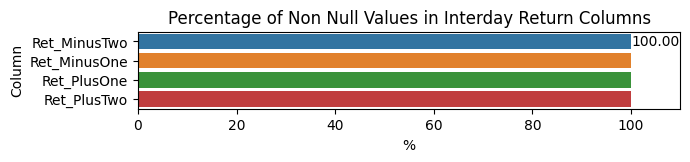

In [202]:
plot_missing(train_df.loc[:, inter_ret_cols], "Interday Return Columns")

There is no missing data in the interday return columns, so we can proceed with them as they are.


In [203]:
train_df[~train_df["Feature_1"].isna()].stack()

12     Id                 1.300000e+01
       Feature_1          6.000000e+00
       Feature_2          4.123636e-02
       Feature_3         -3.860444e-01
       Feature_4          2.551674e-01
                              ...     
39984  Ret_180           -2.354591e-04
       Ret_PlusOne       -1.186162e-02
       Ret_PlusTwo       -9.329307e-03
       Weight_Intraday    1.381946e+06
       Weight_Daily       1.727433e+06
Length: 1119141, dtype: float64

In [34]:
train_df[train_df["Feature_1"].isna()].stack()

0      Id                 1.000000e+00
       Feature_5          8.000000e+00
       Feature_7          7.575100e+04
       Feature_8          2.254000e-01
       Feature_9          1.100000e+01
                              ...     
39999  Ret_180            2.760911e-03
       Ret_PlusOne        2.440521e-02
       Ret_PlusTwo       -2.434548e-02
       Weight_Intraday    1.535389e+06
       Weight_Daily       1.919237e+06
Length: 5465263, dtype: float64

The amount of return data that includes Feature_1 is almost one-fifth compared to the data where Feature_1 is missing.

In [204]:
with_Feature_1_array = train_df[~train_df["Feature_1"].isna()].stack().values
without_Feature_1_array = train_df[train_df["Feature_1"].isna()].stack().values

In [205]:
ttest_result_Feature_1 = scipy.stats.ttest_ind(with_Feature_1_array, without_Feature_1_array)
ttest_result_Feature_1

TtestResult(statistic=np.float64(-1.8071903767124826), pvalue=np.float64(0.07073264650085258), df=np.float64(6584402.0))

Since the p-value of the t-test is greater than 5%, we fail to reject the null hypothesis, indicating that the population means are likely equal. To further explore the distributions, we can compare their KDE plots. Given that the array contains over a million elements, sampling before plotting is recommended to reduce computational load.

In [206]:
with_Feature_1_sample_array = np.random.choice(with_Feature_1_array, size=10_000)
without_Feature_1_sample_array = np.random.choice(without_Feature_1_array, size=10_000)

Plot the KDE for data with and without Feature_1.

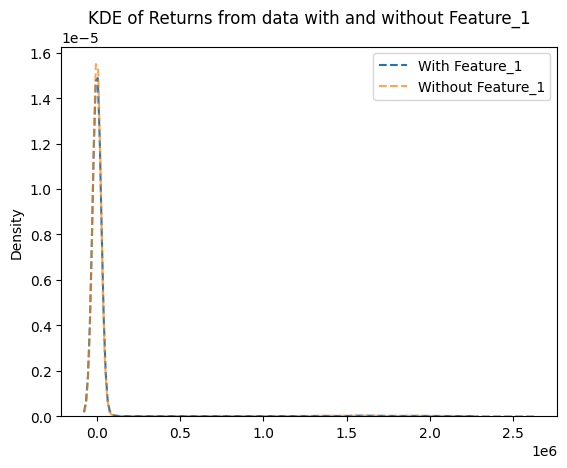

In [208]:
sns.kdeplot(data=with_Feature_1_sample_array, linestyle="--", label="With Feature_1")
ax = sns.kdeplot(data=without_Feature_1_sample_array, alpha=0.7, linestyle="--", label="Without Feature_1")
ax.set_title("KDE of Returns from data with and without Feature_1")
ax.legend();

In [209]:
with_Feature_10_array = train_df[~train_df["Feature_10"].isna()].stack().values
without_Feature_10_array = train_df[train_df["Feature_10"].isna()].stack().values

In [210]:
ttest_result_Feature_10 = scipy.stats.ttest_ind(with_Feature_10_array, without_Feature_10_array)
ttest_result_Feature_10

TtestResult(statistic=np.float64(-6.0059240677460926), pvalue=np.float64(1.9025513144490547e-09), df=np.float64(6584402.0))

In [211]:
with_Feature_10_sample_array = np.random.choice(with_Feature_10_array, size=10_000)
without_Feature_10_sample_array = np.random.choice(without_Feature_10_array, size=10_000)

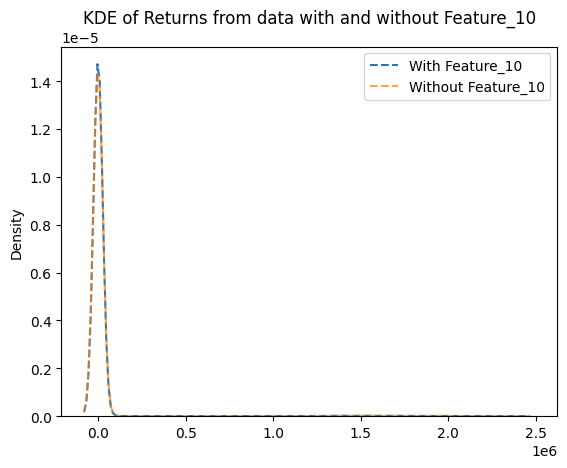

In [212]:
sns.kdeplot(data=with_Feature_10_sample_array, linestyle="--", label="With Feature_10")
ax = sns.kdeplot(data=without_Feature_10_sample_array, alpha=0.7, linestyle="--", label="Without Feature_10")
ax.set_title("KDE of Returns from data with and without Feature_10")
ax.legend();

The KDE plot indicates that the distributions of the two groups are similar. However, the t-test now yields a p-value well below 5%, providing evidence against the null hypothesis of equal means.

Thus, keeping Feature_10 would result in nearly half of the training data having missing values. Therefore, it's reasonable to drop this feature for now.

## Inspect Missing Data in Intraday Returns

intra_ret_train_df = train_df.loc[:, intra_ret_cols]
intra_ret_train_df.head()

We should examine the pattern of missing data to determine whether there are extended periods of missingness. If such patterns exist, they could influence our choice of imputation technique. As a first step, let's identify the maximum number of missing values in each row.

In [215]:
intra_ret_train_missing_counts = intra_ret_train_df.isnull().sum(axis=1) # number of missing data in each row
intra_ret_train_missing_counts

0        16
2         0
3         3
5        10
6        12
         ..
39995     6
39996    18
39997     4
39998     3
39999     7
Length: 32000, dtype: int64

Highest missing count

In [220]:
intra_ret_train_missing_counts.max()

np.int64(30)

Index of the row with highest missing count

In [221]:
intra_ret_train_missing_counts.argmax()

np.int64(114)

The row with highest missing count

In [222]:
intra_ret_train_df.iloc[114]

Ret_2           NaN
Ret_3     -0.000113
Ret_4      0.000124
Ret_5           NaN
Ret_6      0.000335
             ...   
Ret_176   -0.000110
Ret_177    0.001001
Ret_178    0.000775
Ret_179    0.000124
Ret_180    0.000344
Name: 143, Length: 179, dtype: float64

Selecting only the NaNs

In [224]:
intra_ret_train_df.iloc[114][intra_ret_train_df.iloc[114].isna()]

Ret_2     NaN
Ret_5     NaN
Ret_10    NaN
Ret_12    NaN
Ret_15    NaN
Ret_25    NaN
Ret_26    NaN
Ret_28    NaN
Ret_36    NaN
Ret_38    NaN
Ret_42    NaN
Ret_45    NaN
Ret_47    NaN
Ret_49    NaN
Ret_50    NaN
Ret_52    NaN
Ret_60    NaN
Ret_69    NaN
Ret_73    NaN
Ret_74    NaN
Ret_79    NaN
Ret_80    NaN
Ret_83    NaN
Ret_89    NaN
Ret_94    NaN
Ret_95    NaN
Ret_96    NaN
Ret_102   NaN
Ret_104   NaN
Ret_105   NaN
Name: 143, dtype: float64

The row with the most missing values has 30 missing entries, with a maximum of 3 consecutive missing points (specifically at positions 94, 95, and 96). To analyze the pattern of consecutive missing values across other rows, it would be efficient to define a function for this task. This will help streamline the process and make the analysis more manageable.

In [225]:
def count_max_consecutive_missing(row: pd.Series) -> int:
    max_consecutive_missing = row.isna().astype(int).groupby(row.notna().astype(int).cumsum()).sum().max()
    return max_consecutive_missing

count_max_consecutive_missing(intra_ret_train_df.iloc[114])

np.int64(3)

In [226]:
intra_ret_train_consecutive_missing = intra_ret_train_df.apply(count_max_consecutive_missing, axis=1)
intra_ret_train_consecutive_missing

0        3
2        0
3        1
5        2
6        2
        ..
39995    1
39996    2
39997    1
39998    1
39999    1
Length: 32000, dtype: int64

In [227]:
intra_ret_train_consecutive_missing.max()

np.int64(29)

A maximum of 29 consecutive missing data points is significant — this poses a challenge for methods like Last Observation Carried Forward (LOCF), which may not be reliable over such long gaps. Before deciding on an imputation strategy, let’s visualize the distribution by plotting a histogram of the lengths of consecutive missing sequences. This will give us a clearer picture of how frequent and severe such long gaps are.

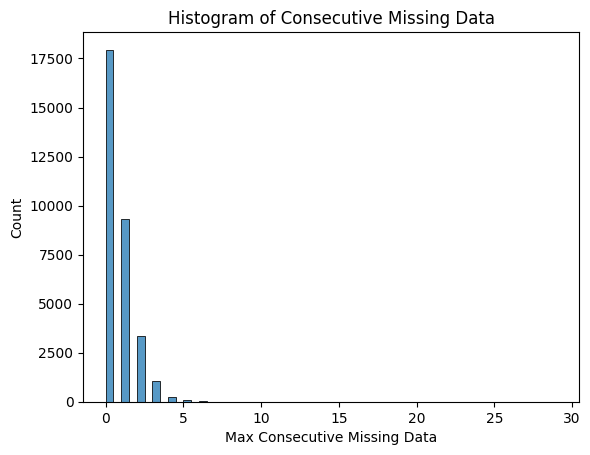

In [229]:
ax = sns.histplot(intra_ret_train_consecutive_missing, binwidth=0.5)
ax.set_title("Histogram of Consecutive Missing Data")
ax.set_xlabel("Max Consecutive Missing Data");

It appears that the majority of rows have little to no consecutive missing data, which is reassuring. Given this, we can reasonably proceed by focusing on the rows with manageable missingness and temporarily ignore those with long sequences of missing values. This approach should allow us to apply imputation techniques like LOCF more effectively without being skewed by extreme cases.

## Pattern of the Returns

Sampling intraday returns

In [232]:
def plot_line_hist(df: pd.DataFrame, hist_xlim: tuple = None):
    nrows = df.shape[0]
    fig, axes = plt.subplots(nrows, 2, figsize=(8, 3 * nrows))
    for i, idx in enumerate(df.index):
        line_ax = axes[i, 0]
        hist_ax = axes[i, 1]
        sns.lineplot(df.loc[idx], ax=line_ax)
        sns.histplot(df.loc[idx], ax=hist_ax)
        line_ax.set_xticks([])
        hist_ax.set_xlabel("")
        if hist_xlim:
            hist_ax.set_xlim(*hist_xlim)

In [233]:
intra_ret_samples = train_df.loc[:, intra_ret_cols].sample(5, random_state=RANDOM_STATE)

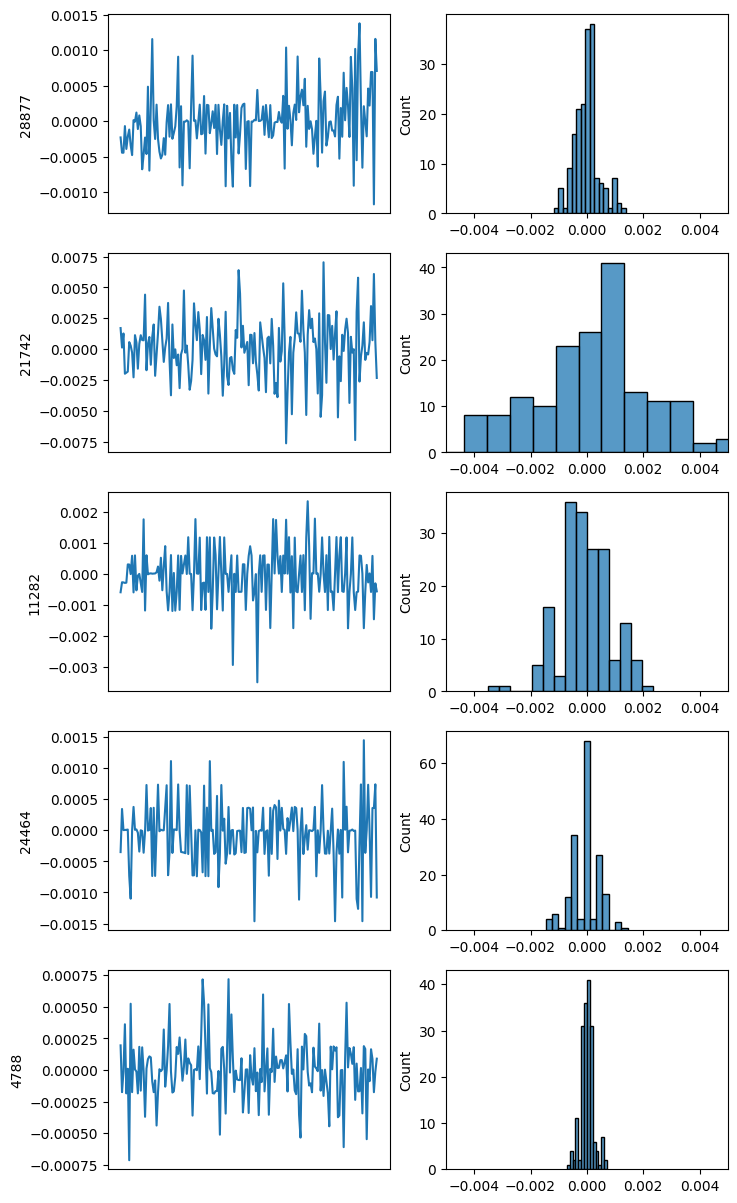

In [234]:
plot_line_hist(intra_ret_samples, hist_xlim=(-0.005, 0.005))

The charts indicate that, for the sampled data, returns are generally centered around 0, suggesting similar means. However, the spread of the distributions hints that the variances might differ. To explore this further, we should look at some interday samples to see whether the distributional characteristics — particularly variance — hold across different days or vary over time. This will help assess the assumption of homoscedasticity and inform our modeling choices.

In [235]:
inter_ret_samples = train_df.loc[:, inter_ret_cols].sample(5, random_state=RANDOM_STATE)

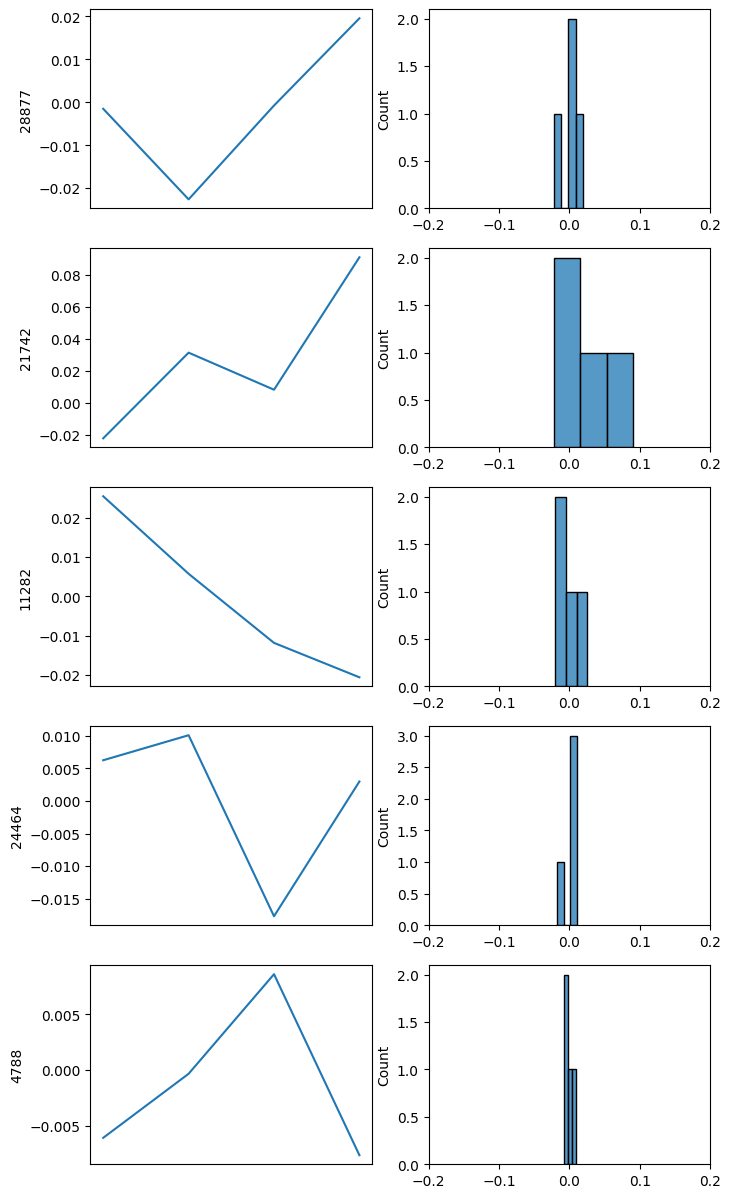

In [236]:
plot_line_hist(inter_ret_samples, hist_xlim=(-0.2, 0.2))

Since each row spans only a 5-day period, it's difficult to observe clear patterns in interday returns over time. However, the chart does suggest that consecutive positive interday returns are possible in some cases.

To get a broader perspective, we should compute the average return across the entire dataset. This will help us understand the overall performance trend — whether returns tend to be positive, negative, or neutral on average — and can serve as a baseline for further analysis or modeling.

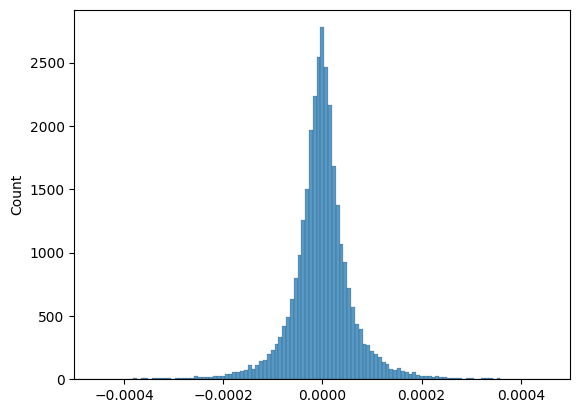

In [237]:
ax = sns.histplot(train_df.loc[:, intra_ret_cols].mean(axis=1))
ax.set_xlim(-0.0005, 0.0005);

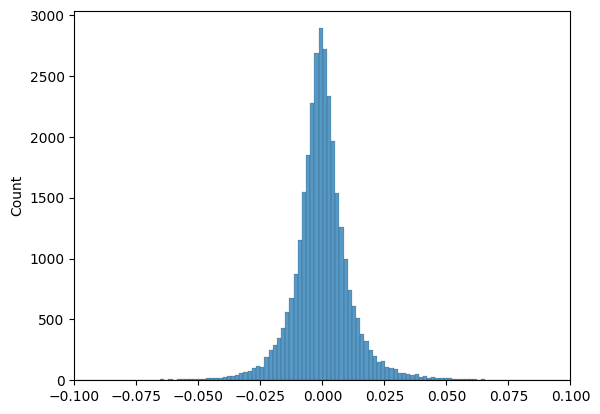

In [238]:
ax = sns.histplot(train_df.loc[:, inter_ret_cols].mean(axis=1))
ax.set_xlim(-0.1, 0.1);

The average returns for both intraday and interday data are approximately zero, as expected. However, the variances differ between them, which may be attributed to the cumulative effect of returns across multiple days in the interday data. This accumulation can lead to larger fluctuations, increasing the overall variance compared to the typically more localised intraday returns.

## Correlations of the Features

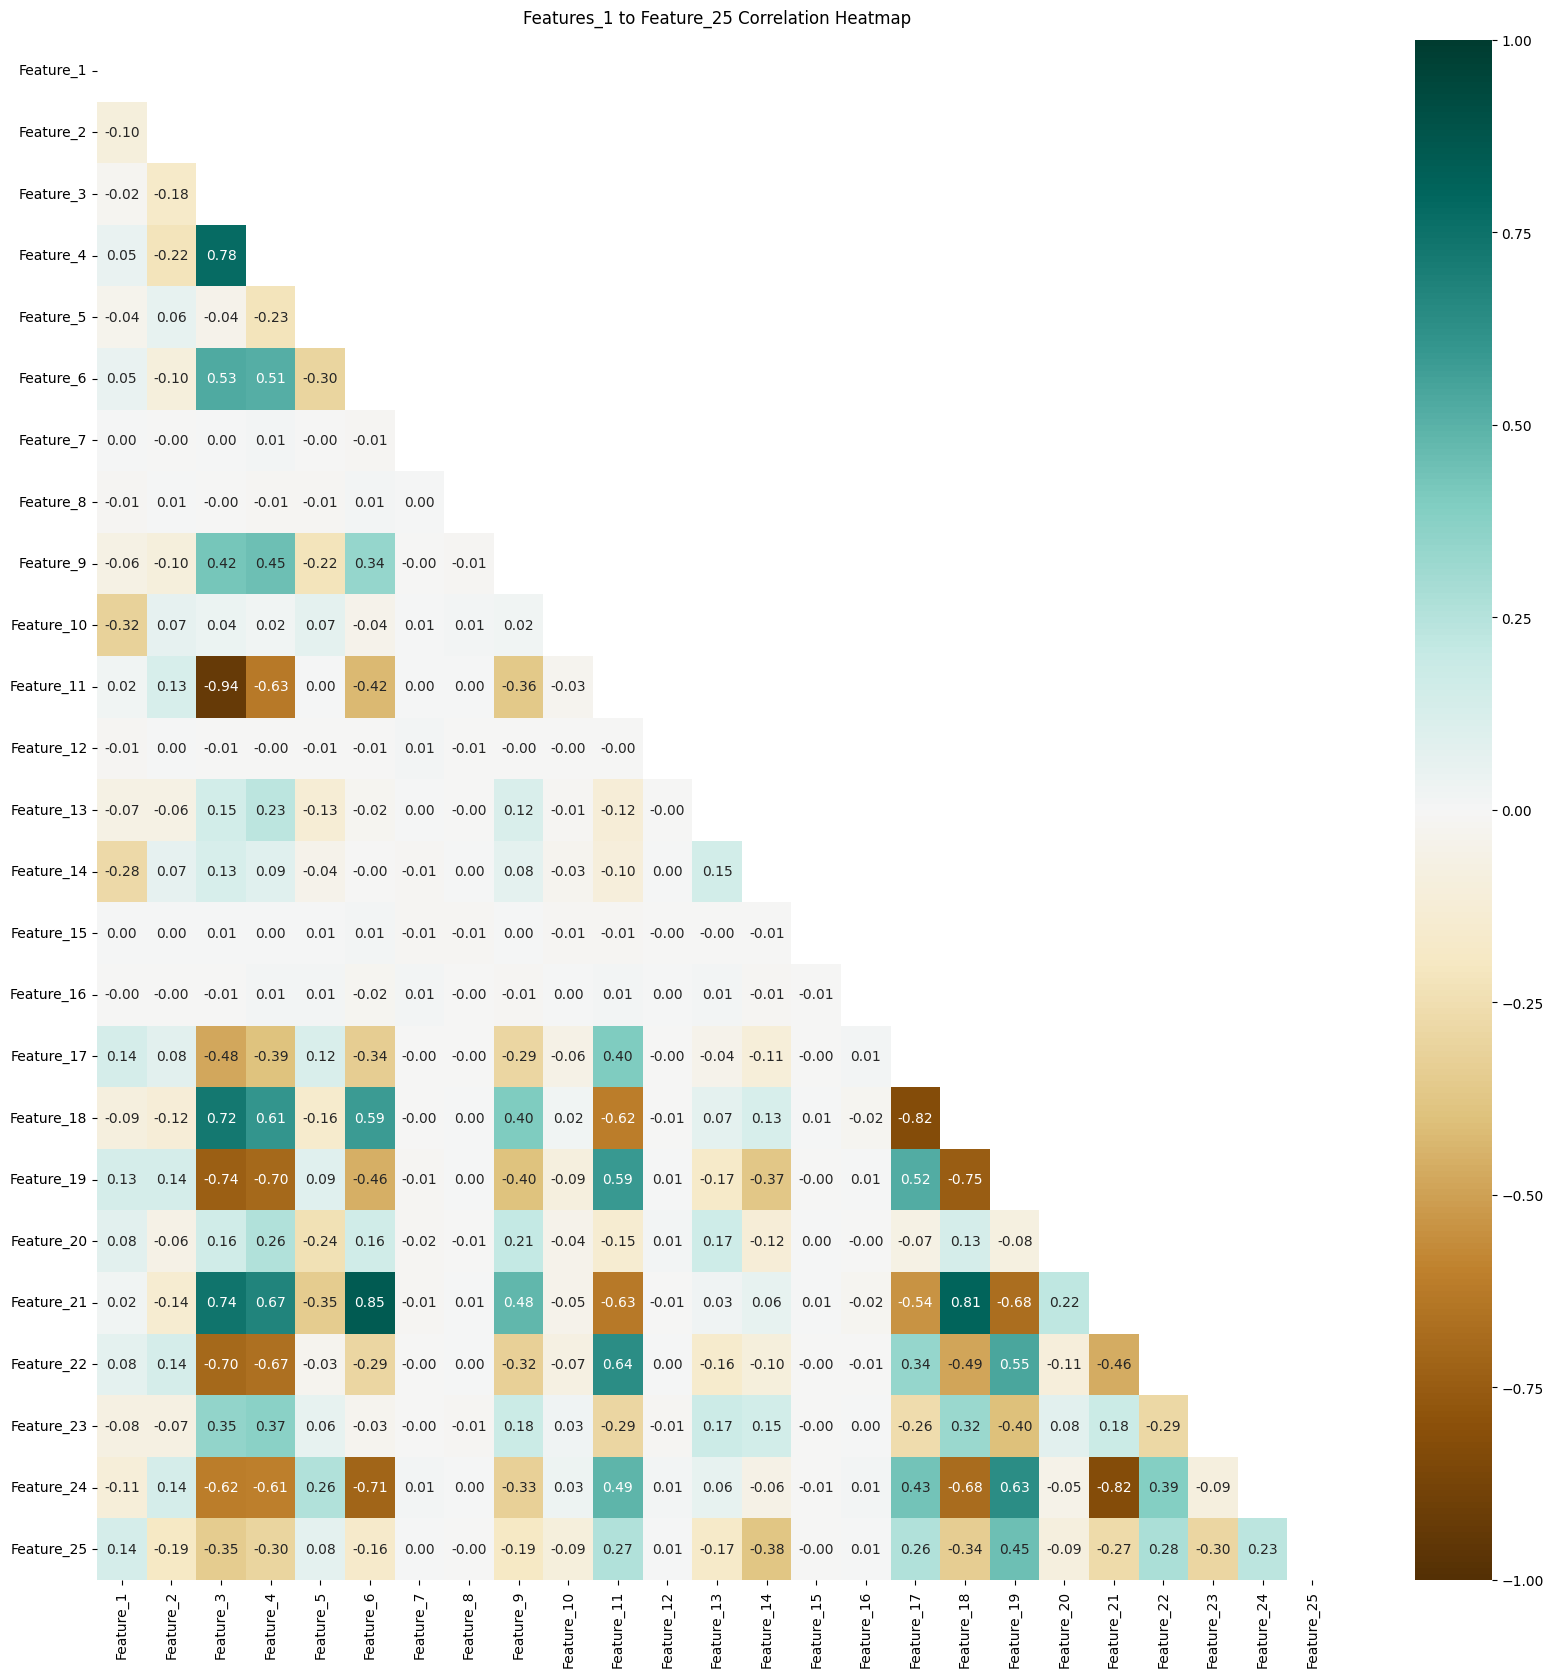

In [239]:
feature_corr_df = train_df.loc[:, feature_cols].corr()
mask = np.triu(np.ones_like(feature_corr_df, dtype=bool))
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax = sns.heatmap(feature_corr_df, vmin=-1, vmax=1, annot=True, mask=mask, cmap='BrBG', fmt=".2f")
ax.set_title('Features_1 to Feature_25 Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Notably, the following pairs of features show high correlation:

- Feature_11 and Feature_3

- Feature_21 and Feature_6

- Feature_24 and Feature_21

These correlations suggest that multicollinearity might be present. It's important to keep these relationships in mind when interpreting the coefficients of our regression model, as they can affect both the stability and interpretability of the estimates.

## Correlations of the Returns

Generally, a time series tend to correlate with itself on the past time lags. In this case, however, the given time series are given in disconnected chunks from different days. This means we can't just concatenate them and apply ACF and PACF. That doesn't mean these plots are not useful though. We can perform this operation on different rows and find if there are common time lags that have high correlation.

In [240]:
def plot_acf_pacf_row(df: pd.DataFrame):
    nrows = df.shape[0]
    fig, axes = plt.subplots(nrows, 2, figsize=(8, 3.2 * nrows))
    for i, idx in enumerate(df.index):
        acf_ax = axes[i, 0]
        pacf_ax = axes[i, 1]
        values = df.loc[idx].ffill().values.flatten() # ffill to make the plots work
        plot_acf(values, ax=acf_ax)
        plot_pacf(values, ax=pacf_ax, method='ywm')
        acf_ax.set_ylabel(idx)
        if i > 0:
            acf_ax.set_title("")
            pacf_ax.set_title("")

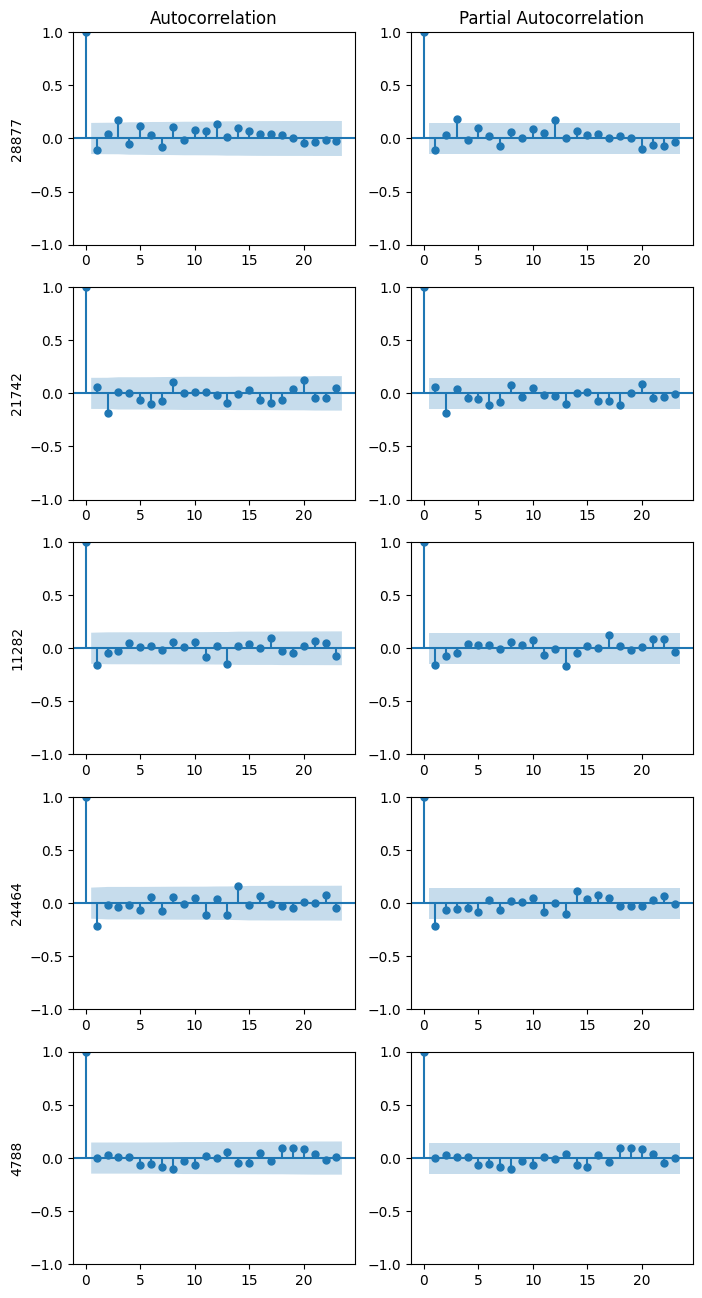

In [241]:
plot_acf_pacf_row(train_df.loc[:, intra_ret_cols].sample(5, random_state=RANDOM_STATE))

From the samples, there is no clear time lag that shows high correlation. We can aggregate the ACF and PACF results from every row of all the data and look for any time lags that frequently have high correlations, while limitting the time lags to 20.

In [242]:
def get_acf_pacf_row(row: pd.Series, nlags: int = 20) -> pd.Series:
    values = row.ffill().values.flatten()
    acf_result = acf(values, nlags=nlags)
    pacf_result = pacf(values, nlags=nlags)
    acf_pacf_result = np.concatenate([acf_result, pacf_result])
    acf_index = [f"ACF_t-{i}" for i in range(nlags + 1)]
    pacf_index = [f"PACF_t-{i}" for i in range(nlags + 1)]
    index = acf_index + pacf_index
    result = pd.Series(acf_pacf_result, index=index)
    return result

In [248]:
intra_train_acf_pacf_df = train_df.loc[:, intra_ret_cols].apply(get_acf_pacf_row, axis=1)

In [249]:
intra_train_acf_df = intra_train_acf_pacf_df.loc[:, intra_train_acf_pacf_df.columns.str.startswith("ACF")]
intra_train_pacf_df = intra_train_acf_pacf_df.loc[:, intra_train_acf_pacf_df.columns.str.startswith("PACF")]

In [250]:
display_all_columns(intra_train_acf_df.head())

,ACF_t-0,ACF_t-1,ACF_t-2,ACF_t-3,ACF_t-4,ACF_t-5,ACF_t-6,ACF_t-7,ACF_t-8,ACF_t-9,ACF_t-10,ACF_t-11,ACF_t-12,ACF_t-13,ACF_t-14,ACF_t-15,ACF_t-16,ACF_t-17,ACF_t-18,ACF_t-19,ACF_t-20
0,1.0,0.109125,0.008563,-0.065712,-0.184880,0.074849,-0.018010,-0.004645,0.035790,0.009737,0.107662,0.077893,-0.021945,0.036567,0.095058,0.069245,0.040210,0.066995,-0.022509,-0.025458,-0.076116
2,1.0,-0.033359,-0.045647,-0.061291,0.000172,0.009618,0.113380,0.058079,0.064470,-0.014567,0.003937,-0.032308,-0.022905,-0.101830,0.011164,-0.012873,0.052596,-0.044900,-0.107811,0.027600,0.002124
3,1.0,-0.221828,0.054747,0.053695,-0.043313,0.002796,-0.055365,-0.043397,0.054128,-0.077431,-0.038979,0.061739,-0.054454,0.101948,-0.056256,-0.075758,0.015125,0.025644,-0.122734,0.018656,0.042011
5,1.0,-0.043865,0.009669,0.071523,-0.016402,-0.023567,-0.019109,-0.050746,0.040473,0.036385,-0.066807,-0.002388,-0.086386,-0.104818,-0.015714,0.157661,-0.100486,-0.024416,-0.035752,0.032005,-0.091177
6,1.0,-0.032628,-0.040714,0.013715,-0.136263,0.087976,0.046575,0.032523,-0.048596,-0.030141,0.106474,-0.046369,0.036751,-0.049176,-0.029503,-0.006515,-0.001249,0.172088,-0.053566,0.034558,0.014072


In [251]:
display_all_columns(intra_train_pacf_df.head())

,PACF_t-0,PACF_t-1,PACF_t-2,PACF_t-3,PACF_t-4,PACF_t-5,PACF_t-6,PACF_t-7,PACF_t-8,PACF_t-9,PACF_t-10,PACF_t-11,PACF_t-12,PACF_t-13,PACF_t-14,PACF_t-15,PACF_t-16,PACF_t-17,PACF_t-18,PACF_t-19,PACF_t-20
0,1.0,0.109738,-0.003424,-0.068233,-0.177262,0.121464,-0.043457,-0.022826,0.019102,0.041091,0.090612,0.066033,-0.030309,0.062371,0.148311,0.059331,0.013539,0.122778,0.000045,-0.027787,-0.084723
2,1.0,-0.033546,-0.047342,-0.065767,-0.006759,0.003538,0.114296,0.071137,0.087477,0.013216,0.020551,-0.028092,-0.044395,-0.139216,-0.035136,-0.047537,0.034328,-0.039703,-0.108815,0.064242,0.018524
3,1.0,-0.223074,0.005897,0.071778,-0.018371,-0.016898,-0.065498,-0.070690,0.039540,-0.051735,-0.076754,0.037148,-0.027216,0.091224,-0.025940,-0.119199,-0.054821,0.052039,-0.115038,-0.051627,0.057792
5,1.0,-0.044112,0.007848,0.073664,-0.010488,-0.027172,-0.027270,-0.052692,0.042331,0.046836,-0.062579,-0.018913,-0.102153,-0.114129,-0.024343,0.198258,-0.082431,-0.064540,-0.086209,0.042545,-0.095843
6,1.0,-0.032812,-0.042296,0.011185,-0.140687,0.084253,0.041455,0.048531,-0.068436,-0.008163,0.114308,-0.042530,0.022374,-0.061808,0.010839,-0.041461,0.002457,0.171563,-0.038866,0.055676,0.002054


Plotting box plots of every time lag

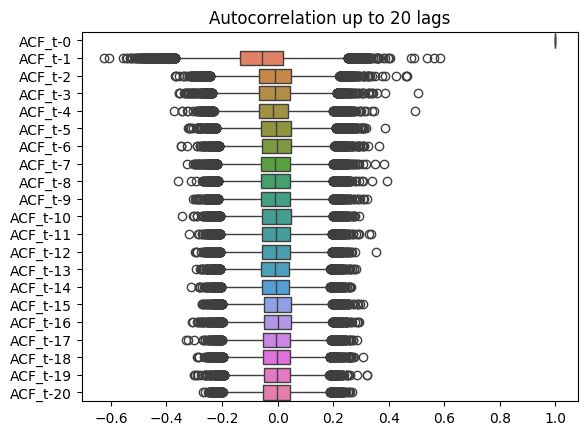

In [252]:
ax = sns.boxplot(intra_train_acf_df, orient="h")
ax.set_title("Autocorrelation up to 20 lags");

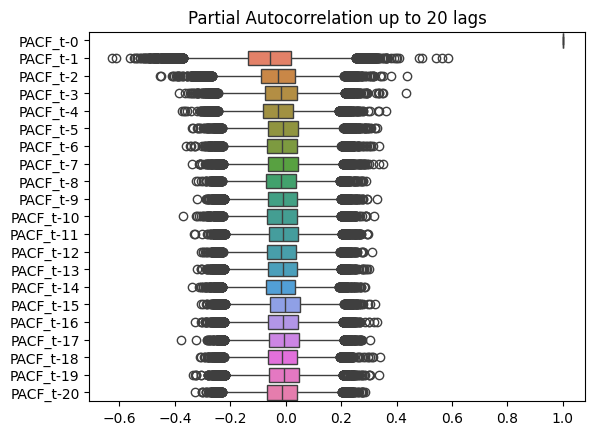

In [253]:
ax = sns.boxplot(intra_train_pacf_df, orient="h")
ax.set_title("Partial Autocorrelation up to 20 lags");

The plot show that there's only the first time lag that generally has ralatively higher correlation. We can use this to decide the length of our lookback window. Now, let's see the interday returns. Keep in mind that the interday returns we have only 2 past returns and 2 future returns to be forecasted.

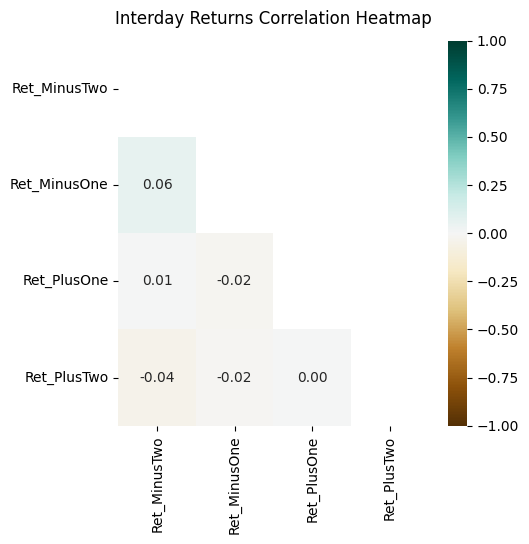

In [254]:
inter_corr_df = train_df.loc[:, inter_ret_cols].corr()
mask = np.triu(np.ones_like(inter_corr_df, dtype=bool))
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax = sns.heatmap(inter_corr_df, vmin=-1, vmax=1, annot=True, mask=mask, cmap='BrBG', fmt=".2f")
ax.set_title('Interday Returns Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

There are no high correlations between the interday returns. Coupled with the fact that there are only 2 past daily returns, we might not need to use complex models.

Since we’re forecasting 60 intraday and 2 interday returns, we can compute the correlation between each target and Features 1–25 individually. However, because intraday returns aren’t tied to consistent times of day, it makes sense to first summarize them (e.g., using the mean or median) before calculating correlations.

## Correlation of the Features to the Targets

In [257]:
feature_target_df = train_df.loc[:, feature_cols + inter_ret_target_cols]
display_all_columns(feature_target_df.head())

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_PlusOne,Ret_PlusTwo
0,NaN,NaN,NaN,NaN,8.0,NaN,75751,0.2254,11.0,NaN,NaN,0.49,5.0,1.842984,27.053679,1.0,NaN,NaN,-0.925463,2.0,NaN,-0.489492,NaN,NaN,NaN,-0.019512,0.028846
2,NaN,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,5.0,-0.473024,0.03,6.0,1.871160,9.647559,1.0,-1.132426,1.799813,-1.603488,3.0,NaN,0.389061,1.728096,-1.798090,-1.019370,-0.024791,0.015711
3,NaN,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,5.0,-2.138383,0.00,6.0,NaN,1.801865,1.0,-1.131213,1.565036,NaN,7.0,1.148738,-2.440799,1.551425,-1.788725,NaN,-0.005680,-0.002190
5,NaN,NaN,-0.680515,NaN,1.0,0.227034,24099,0.2064,8.0,NaN,0.668207,0.65,1.0,1.607182,1.059815,1.0,-0.587538,0.230375,-0.897600,10.0,0.111960,1.670980,0.364626,1.039643,-0.404685,0.031098,-0.006551
6,NaN,-0.230636,-0.227021,-0.084126,7.0,-0.095007,39351,0.3650,13.0,NaN,0.614787,0.85,7.0,1.829130,0.525992,1.0,-0.140953,0.016076,-0.966690,3.0,-0.186534,1.080087,0.799836,-0.753148,-0.440274,-0.011105,-0.030745


In [258]:
feature_target_df["Intraday Mean Return"] = train_df.loc[:, intra_ret_feat_cols].mean(axis=1)
display_all_columns(feature_target_df.head())

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_PlusOne,Ret_PlusTwo,Intraday Mean Return
0,NaN,NaN,NaN,NaN,8.0,NaN,75751,0.2254,11.0,NaN,NaN,0.49,5.0,1.842984,27.053679,1.0,NaN,NaN,-0.925463,2.0,NaN,-0.489492,NaN,NaN,NaN,-0.019512,0.028846,-0.000245
2,NaN,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,5.0,-0.473024,0.03,6.0,1.871160,9.647559,1.0,-1.132426,1.799813,-1.603488,3.0,NaN,0.389061,1.728096,-1.798090,-1.019370,-0.024791,0.015711,-0.000005
3,NaN,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,5.0,-2.138383,0.00,6.0,NaN,1.801865,1.0,-1.131213,1.565036,NaN,7.0,1.148738,-2.440799,1.551425,-1.788725,NaN,-0.005680,-0.002190,0.000011
5,NaN,NaN,-0.680515,NaN,1.0,0.227034,24099,0.2064,8.0,NaN,0.668207,0.65,1.0,1.607182,1.059815,1.0,-0.587538,0.230375,-0.897600,10.0,0.111960,1.670980,0.364626,1.039643,-0.404685,0.031098,-0.006551,0.000130
6,NaN,-0.230636,-0.227021,-0.084126,7.0,-0.095007,39351,0.3650,13.0,NaN,0.614787,0.85,7.0,1.829130,0.525992,1.0,-0.140953,0.016076,-0.966690,3.0,-0.186534,1.080087,0.799836,-0.753148,-0.440274,-0.011105,-0.030745,0.000051


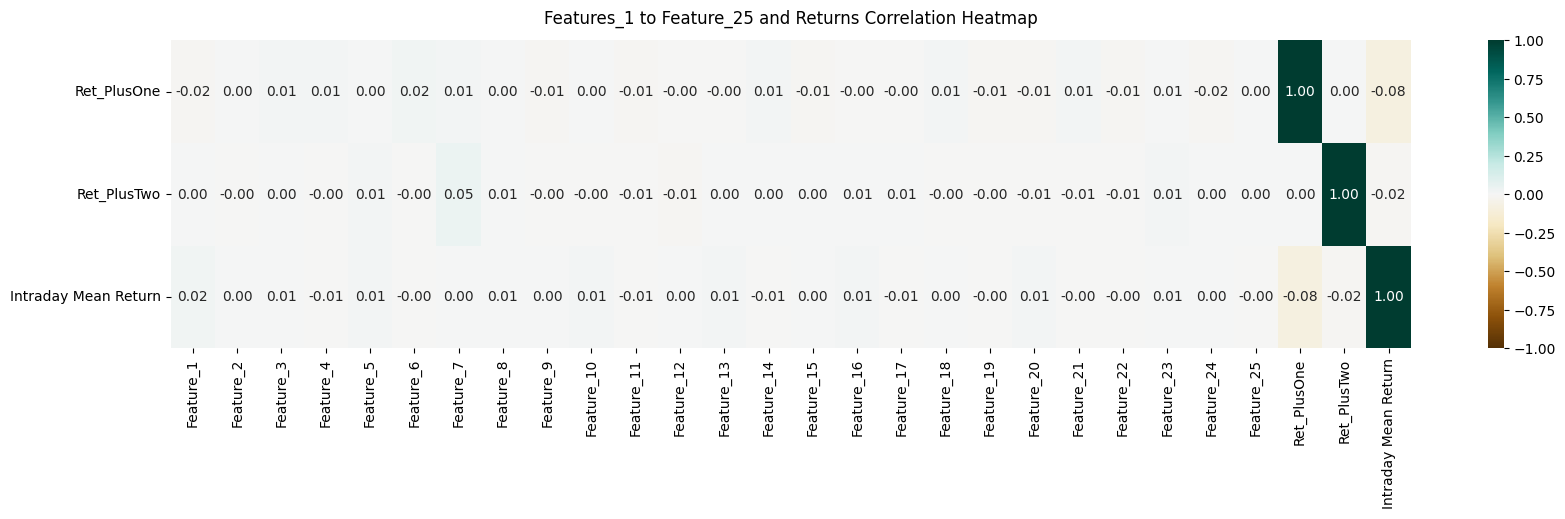

In [259]:
feature_target_corr_df = feature_target_df.corr().drop(feature_cols)
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
ax = sns.heatmap(feature_target_corr_df, vmin=-1, vmax=1, annot=True, cmap='BrBG', fmt=".2f")
ax.set_title('Features_1 to Feature_25 and Returns Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

The result shows that the correlations between Feature_1 to Feature_25 and the returns data are low for both the intraday mean and interday.

# Data Preprocessing

Based on our data analysis, we can start with a subset of features for an initial experiment. We'll use a simple direct forecasting approach for this first run. The selected input features are:

- Intraday returns: time lags up to t−10

- Interday returns: all available lags

- Feature_2 to Feature_25, excluding Feature_1 and Feature_10 due to their high proportion of missing values

This setup keeps the model straightforward while still capturing key temporal and feature-based signals.

In [261]:
selected_feature_cols = [f"Feature_{i}" for i in range(1, 26) if i not in [1, 10]]

In [262]:
selected_intra_cols = selected_feature_cols + intra_ret_feat_cols[-10:]
selected_intra_cols

['Feature_2',
 'Feature_3',
 'Feature_4',
 'Feature_5',
 'Feature_6',
 'Feature_7',
 'Feature_8',
 'Feature_9',
 'Feature_11',
 'Feature_12',
 'Feature_13',
 'Feature_14',
 'Feature_15',
 'Feature_16',
 'Feature_17',
 'Feature_18',
 'Feature_19',
 'Feature_20',
 'Feature_21',
 'Feature_22',
 'Feature_23',
 'Feature_24',
 'Feature_25',
 'Ret_111',
 'Ret_112',
 'Ret_113',
 'Ret_114',
 'Ret_115',
 'Ret_116',
 'Ret_117',
 'Ret_118',
 'Ret_119',
 'Ret_120']

In [263]:
selected_inter_cols = selected_feature_cols + inter_ret_feat_cols
selected_inter_cols

['Feature_2',
 'Feature_3',
 'Feature_4',
 'Feature_5',
 'Feature_6',
 'Feature_7',
 'Feature_8',
 'Feature_9',
 'Feature_11',
 'Feature_12',
 'Feature_13',
 'Feature_14',
 'Feature_15',
 'Feature_16',
 'Feature_17',
 'Feature_18',
 'Feature_19',
 'Feature_20',
 'Feature_21',
 'Feature_22',
 'Feature_23',
 'Feature_24',
 'Feature_25',
 'Ret_MinusTwo',
 'Ret_MinusOne']

## Feature_n Imputation

Computing using Mean

In [264]:
feature_imputer = Imputer(method="mean")

In [265]:
imputed_train_feature_df = feature_imputer.fit_transform(train_df.loc[:, selected_feature_cols])

In [266]:
display_all_columns(imputed_train_feature_df.head())

,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
0,-0.115652,0.562882,0.407536,8.0,0.438461,75751,0.2254,11.0,-0.578247,0.49,5.0,1.842984,27.053679,1.0,-0.551236,0.808360,-0.925463,2.0,0.610530,-0.489492,0.798795,-1.212693,-0.327696
2,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,-0.473024,0.03,6.0,1.871160,9.647559,1.0,-1.132426,1.799813,-1.603488,3.0,0.610530,0.389061,1.728096,-1.798090,-1.019370
3,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,-2.138383,0.00,6.0,1.588420,1.801865,1.0,-1.131213,1.565036,-1.205745,7.0,1.148738,-2.440799,1.551425,-1.788725,-0.327696
5,-0.115652,-0.680515,0.407536,1.0,0.227034,24099,0.2064,8.0,0.668207,0.65,1.0,1.607182,1.059815,1.0,-0.587538,0.230375,-0.897600,10.0,0.111960,1.670980,0.364626,1.039643,-0.404685
6,-0.230636,-0.227021,-0.084126,7.0,-0.095007,39351,0.3650,13.0,0.614787,0.85,7.0,1.829130,0.525992,1.0,-0.140953,0.016076,-0.966690,3.0,-0.186534,1.080087,0.799836,-0.753148,-0.440274


In [267]:
imputed_test_feature_df = feature_imputer.transform(test_df.loc[:, selected_feature_cols])

In [268]:
display_all_columns(imputed_test_feature_df.head())

,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
1,-0.115652,0.562882,0.407536,3.0,0.388896,17369,0.0166,13.0,-0.409923,0.71,9.0,1.577586,9.546915,1.0,-0.949891,0.917958,-0.897067,9.000000,0.886205,-0.151805,1.239856,0.953424,-0.709462
4,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,-4.795565,0.97,5.0,0.842102,9.198895,1.0,6.317498,-3.208872,-1.102189,7.000000,3.381040,1.732708,1.965189,-5.993092,3.219820
7,2.582955,0.157344,0.617261,8.0,-0.177333,92214,0.2119,8.0,0.302677,0.48,3.0,1.489166,0.262896,1.0,-0.788162,0.951173,-1.896213,5.270921,0.264332,0.014091,1.071300,-2.083937,-0.706392
13,0.480362,0.915407,1.381156,7.0,0.223401,35023,0.2138,10.0,-1.219864,0.89,5.0,1.848343,0.166849,1.0,-0.592927,0.682742,-1.347018,4.000000,0.352247,0.586843,0.907012,-2.096931,-0.844257
23,-1.833909,0.807421,0.396305,7.0,0.225614,57773,0.2986,7.0,-0.965748,0.34,0.0,1.189478,0.496784,1.0,-0.800207,0.811756,-0.564181,9.000000,0.303550,0.180322,1.147526,-0.111506,2.704840


## Intraday Imputation

In [269]:
intra_imputer = Imputer(method="ffill")

In [270]:
imputed_train_intra_df = intra_imputer.fit_transform(train_df.loc[:, intra_ret_feat_cols])

In [271]:
display_all_columns(imputed_train_intra_df.head())

,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,Ret_12,Ret_13,Ret_14,Ret_15,Ret_16,Ret_17,Ret_18,Ret_19,Ret_20,Ret_21,Ret_22,Ret_23,Ret_24,Ret_25,Ret_26,Ret_27,Ret_28,Ret_29,Ret_30,Ret_31,Ret_32,Ret_33,Ret_34,Ret_35,Ret_36,Ret_37,Ret_38,Ret_39,Ret_40,Ret_41,Ret_42,Ret_43,Ret_44,Ret_45,Ret_46,Ret_47,Ret_48,Ret_49,Ret_50,Ret_51,Ret_52,Ret_53,Ret_54,Ret_55,Ret_56,Ret_57,Ret_58,Ret_59,Ret_60,Ret_61,Ret_62,Ret_63,Ret_64,Ret_65,Ret_66,Ret_67,Ret_68,Ret_69,Ret_70,Ret_71,Ret_72,Ret_73,Ret_74,Ret_75,Ret_76,Ret_77,Ret_78,Ret_79,Ret_80,Ret_81,Ret_82,Ret_83,Ret_84,Ret_85,Ret_86,Ret_87,Ret_88,Ret_89,Ret_90,Ret_91,Ret_92,Ret_93,Ret_94,Ret_95,Ret_96,Ret_97,Ret_98,Ret_99,Ret_100,Ret_101,Ret_102,Ret_103,Ret_104,Ret_105,Ret_106,Ret_107,Ret_108,Ret_109,Ret_110,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120
0,2.954272e-06,-0.000734,-0.000738,-0.000007,0.000423,0.000438,-0.000076,6.446240e-04,-0.000006,0.000006,-0.000930,-0.000156,0.000663,0.000787,-0.000430,-1.964625e-05,0.000002,-0.000031,0.000003,0.000141,-0.000008,0.000532,0.000416,-0.000164,-0.000009,-0.000438,-0.000268,0.000010,-7.176461e-04,-0.000162,-0.000399,-0.000388,0.000025,-0.000582,0.001003,-0.000010,0.000134,0.000014,-0.000142,-0.001003,-0.000007,-0.000005,-0.000013,-0.000252,0.000706,-0.000734,-0.000731,-0.001996,-0.000153,0.000133,-0.000528,0.000530,-0.000007,0.000713,0.000009,-0.000003,-0.000432,-0.001152,-0.000723,9.982299e-07,-0.003579,0.000435,-0.000012,-1.320877e-04,0.000004,0.000418,-0.000011,-1.309833e-04,-2.723725e-03,-0.002996,0.000129,0.000012,-1.757219e-06,-0.000137,-0.003537,-0.000142,0.000135,0.000020,-1.318606e-04,0.000449,-0.000008,0.000006,0.000282,-0.000139,-0.000128,0.000005,-0.000005,-1.693501e-03,-0.002141,0.000003,-0.000274,-0.000015,0.001279,0.000282,-0.000003,-0.000156,0.000024,-0.000560,-0.000580,0.000138,-0.002277,0.000125,0.000406,-0.000427,-0.000013,-0.000843,0.000167,0.000569,0.000695,0.000250,0.000700,-0.000843,0.000268,-0.000415,-0.001133,0.000004,-0.000137,-0.000009,0.000134
2,-7.822703e-04,-0.000402,0.000807,0.000400,0.000656,-0.001177,0.001198,6.100221e-04,-0.001031,0.000647,-0.000930,-0.000543,0.000663,0.000787,0.000390,1.348995e-04,0.000122,-0.000133,0.000003,0.000141,0.000538,0.000532,0.000106,0.000106,-0.000261,0.000125,-0.000268,-0.000404,-7.805902e-04,0.000270,-0.000399,-0.000388,0.000025,-0.000500,-0.000909,0.000532,-0.000908,-0.000007,-0.000780,-0.000140,-0.000530,0.000142,0.000518,-0.000252,0.000130,0.000384,0.000648,0.000115,0.000767,-0.000911,-0.000528,0.000530,-0.000278,-0.000776,-0.000128,-0.000003,0.000139,-0.000284,-0.000144,-3.869633e-04,-0.000651,-0.000139,0.000780,5.164489e-04,-0.001057,-0.000640,0.000660,-1.309833e-04,1.062824e-05,-0.000274,-0.000796,0.000510,-3.820386e-04,0.000133,-0.000386,-0.000011,-0.000525,0.001158,5.364737e-07,-0.000269,0.000135,0.000388,0.000660,0.000135,-0.000392,0.000256,-0.000538,3.916393e-04,-0.000267,0.000143,0.000127,0.000118,-0.000406,0.000004,0.000366,-0.000133,-0.000272,0.000013,-0.000134,0.000654,-0.000129,0.000517,0.000271,0.000370,-0.000011,0.000532,0.000513,0.000393,-0.000273,0.000250,-0.000138,-0.000266,0.000786,0.001702,-0.000271,-0.000530,-0.000666,-0.000270,-0.000372
3,2.773425e-04,-0.000088,-0.000199,-0.000301,0.000711,-0.000431,-0.000144,3.404036e-04,-0.000639,0.000420,0.000145,-0.000130,0.000589,0.000410,0.000134,6.039066e-07,-0.000266,0.000071,-0.000058,-0.000710,0.000285,-0.000141,0.000003,0.000281,0.000012,0.000001,-0.000291,0.000003,-9.865118e-07,-0.000283,0.000290,-0.000153,0.000015,-0.000007,-0.000417,0.000145,-0.000295,-0.000282,-0.000150,-0.000141,0.000558,0.000061,0.000518,0.000303,0.000332,-0.000164,0.000011,0.000285,0.000148,-0.000132,-0.000107,-0.000166,0.000268,-0.000560,0.000203,-0.000003,-0.000127,-0.000076,-0.000294,1.790711e-05,0.000418,0.000083,-0.000208,7.080493e-04,-0.000369,0.000362,-0.000004,6.728819e-05,-7.099829e-05,-0.000274,0.000282,0.000301,-1.750760e-05,0.000124,0.000281,0.000157,-0.000001,-0.000430,-1.475570e-0

In [272]:
imputed_test_intra_df = intra_imputer.transform(test_df.loc[:, intra_ret_feat_cols])

In [273]:
display_all_columns(imputed_test_intra_df.head())

,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,Ret_12,Ret_13,Ret_14,Ret_15,Ret_16,Ret_17,Ret_18,Ret_19,Ret_20,Ret_21,Ret_22,Ret_23,Ret_24,Ret_25,Ret_26,Ret_27,Ret_28,Ret_29,Ret_30,Ret_31,Ret_32,Ret_33,Ret_34,Ret_35,Ret_36,Ret_37,Ret_38,Ret_39,Ret_40,Ret_41,Ret_42,Ret_43,Ret_44,Ret_45,Ret_46,Ret_47,Ret_48,Ret_49,Ret_50,Ret_51,Ret_52,Ret_53,Ret_54,Ret_55,Ret_56,Ret_57,Ret_58,Ret_59,Ret_60,Ret_61,Ret_62,Ret_63,Ret_64,Ret_65,Ret_66,Ret_67,Ret_68,Ret_69,Ret_70,Ret_71,Ret_72,Ret_73,Ret_74,Ret_75,Ret_76,Ret_77,Ret_78,Ret_79,Ret_80,Ret_81,Ret_82,Ret_83,Ret_84,Ret_85,Ret_86,Ret_87,Ret_88,Ret_89,Ret_90,Ret_91,Ret_92,Ret_93,Ret_94,Ret_95,Ret_96,Ret_97,Ret_98,Ret_99,Ret_100,Ret_101,Ret_102,Ret_103,Ret_104,Ret_105,Ret_106,Ret_107,Ret_108,Ret_109,Ret_110,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120
1,-0.000487,0.000475,0.000002,-0.000002,-0.000523,-0.000255,-0.000008,0.000048,-0.000312,-0.000742,-0.000009,-0.000248,0.000487,0.000256,-0.000508,0.000250,0.000015,0.000008,-0.000251,-0.000519,-5.029784e-04,0.000240,0.000248,4.947589e-04,-0.000243,-0.000252,-2.519636e-04,-0.000230,0.000212,-0.000503,-0.000014,-0.000008,0.000241,0.000017,-0.000254,0.000250,-0.000250,-2.541045e-06,-0.000254,-0.000006,-0.001000,0.000244,-5.060288e-04,0.000490,-0.000503,0.000241,2.252539e-05,5.075899e-04,-0.000241,0.000244,0.000354,-0.000575,0.000266,0.000253,0.000238,-0.000002,4.446670e-04,-0.000180,-0.000228,-0.000767,-0.000260,-0.000002,-0.000490,-0.000266,-0.000243,-0.000248,-0.000730,-0.000246,-0.000102,0.000363,-0.000506,-0.000247,-0.000004,8.426020e-07,-0.000740,-0.000509,-0.000004,-0.000745,-0.000503,0.000244,0.000006,0.000750,0.000745,2.358982e-04,2.546037e-04,0.000001,-0.000118,-0.000124,-0.000012,-0.000017,-0.000728,-0.000489,0.000743,-5.069956e-04,0.000003,-1.226296e-04,-1.325195e-04,0.000753,-0.000003,-0.000264,-0.000118,0.000244,-0.000377,-0.000007,-0.000486,0.000745,-7.091554e-07,-0.000240,0.000230,-0.000010,2.494024e-04,0.000492,-0.000022,0.000046,-0.000294,-0.000366,-0.000125,-0.000007,2.558108e-04
4,-0.001232,0.000002,-0.001205,-0.000021,0.000005,0.000623,-0.001843,0.000005,0.001226,0.001213,-0.002428,0.000974,0.000249,-0.001217,0.001220,0.000024,-0.000017,-0.001246,0.001220,-0.000006,4.624901e-07,-0.001222,-0.000001,1.228060e-03,0.001220,-0.001213,1.217567e-03,-0.001215,0.001226,-0.000015,0.000002,-0.000002,-0.000005,0.000004,0.001217,0.000003,-0.000022,-7.422013e-06,0.000002,-0.000008,-0.000009,-0.000006,-9.126965e-07,0.000005,0.000009,-0.000005,-1.239919e-07,4.326580e-06,0.000007,-0.001222,-0.001221,0.001228,-0.000005,0.000001,0.001219,-0.000240,2.631727e-04,0.000020,0.000004,-0.000002,0.000007,-0.000361,0.000378,-0.001212,0.001230,0.000004,-0.000007,0.000008,0.000012,-0.001233,-0.001211,0.001229,-0.000001,-1.596883e-03,0.000363,-0.000019,-0.001202,0.001234,0.000001,-0.001209,-0.000018,0.000007,-0.000003,4.432056e-07,3.499550e-07,0.001203,0.000014,-0.000013,-0.001220,-0.000007,-0.000008,-0.001205,0.000256,-2.482979e-04,0.000750,-7.317127e-04,1.218458e-03,0.000021,0.000009,-0.001201,-0.001196,0.001213,-0.001214,0.001227,0.000026,-0.000005,2.430941e-03,-0.001192,0.000008,-0.000014,1.209899e-03,0.000011,-0.000005,-0.000011,0.000003,-0.001229,-0.000003,0.001208,-4.473375e-07
7,0.000176,0.000558,-0.000007,0.000005,-0.000016,-0.000247,0.000071,0.000167,-0.000729,0.000257,0.000002,-0.000986,0.000236,-0.000507,0.000004,-0.000238,-0.000254,0.000003,-0.000215,-0.000044,2.499140e-04,0.000244,0.000011,3.857622e-07,0.000497,0.000249,-2.365839e-04,-0.000242,-0.000006,-0.000263,0.000241,-0.000247,-0.000006,0.000251,0.000005,0.000007,0.000012,4.167173e-07,0.000010,0.000016,-0.000744,-0.001504,4.835785e-04,-0.000504,0.000002,0.000682,-1.723839e-04,-7.902223e-04,0.000476,-0.000234,0.000003,0.000011,0.000014,0.000008,0.000235,-0.000004,-3.532657e-08,0.000252,0.000245,-0.001490,0.000494,0.000030,-0.000004,0.000747,-0.000034,-0.000216,-0.000503,0.000267,0.000491,0.001236,0.000495,-0.000244,-0.000491,-2.541025e-04,-0

## Features for Intraday Forecasting

Combininng the features and intraday returns

In [275]:
X_train_intra = pd.concat([imputed_train_feature_df, imputed_train_intra_df.iloc[:, -10:]], axis=1)

In [276]:
display_all_columns(X_train_intra.head())

,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120
0,-0.115652,0.562882,0.407536,8.0,0.438461,75751,0.2254,11.0,-0.578247,0.49,5.0,1.842984,27.053679,1.0,-0.551236,0.808360,-0.925463,2.0,0.610530,-0.489492,0.798795,-1.212693,-0.327696,0.000250,0.000700,-0.000843,0.000268,-0.000415,-0.001133,0.000004,-0.000137,-0.000009,0.000134
2,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,-0.473024,0.03,6.0,1.871160,9.647559,1.0,-1.132426,1.799813,-1.603488,3.0,0.610530,0.389061,1.728096,-1.798090,-1.019370,0.000250,-0.000138,-0.000266,0.000786,0.001702,-0.000271,-0.000530,-0.000666,-0.000270,-0.000372
3,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,-2.138383,0.00,6.0,1.588420,1.801865,1.0,-1.131213,1.565036,-1.205745,7.0,1.148738,-2.440799,1.551425,-1.788725,-0.327696,-0.000571,0.000288,0.000006,0.000148,-0.000260,0.000387,-0.000435,-0.000689,0.000153,0.000222
5,-0.115652,-0.680515,0.407536,1.0,0.227034,24099,0.2064,8.0,0.668207,0.65,1.0,1.607182,1.059815,1.0,-0.587538,0.230375,-0.897600,10.0,0.111960,1.670980,0.364626,1.039643,-0.404685,0.000921,0.001154,-0.000249,-0.000223,-0.000460,-0.000684,0.000463,0.000444,0.002801,-0.000937
6,-0.230636,-0.227021,-0.084126,7.0,-0.095007,39351,0.3650,13.0,0.614787,0.85,7.0,1.829130,0.525992,1.0,-0.140953,0.016076,-0.966690,3.0,-0.186534,1.080087,0.799836,-0.753148,-0.440274,-0.000341,0.000158,0.000161,-0.000005,0.000480,0.000635,0.000648,-0.000346,0.000324,0.000323


In [277]:
X_test_intra = pd.concat([imputed_test_feature_df, imputed_test_intra_df.iloc[:, -10:]], axis=1)

In [278]:
display_all_columns(X_test_intra.head())

,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120
1,-0.115652,0.562882,0.407536,3.0,0.388896,17369,0.0166,13.0,-0.409923,0.71,9.0,1.577586,9.546915,1.0,-0.949891,0.917958,-0.897067,9.000000,0.886205,-0.151805,1.239856,0.953424,-0.709462,-0.000010,2.494024e-04,0.000492,-0.000022,0.000046,-0.000294,-0.000366,-0.000125,-0.000007,2.558108e-04
4,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,-4.795565,0.97,5.0,0.842102,9.198895,1.0,6.317498,-3.208872,-1.102189,7.000000,3.381040,1.732708,1.965189,-5.993092,3.219820,-0.000014,1.209899e-03,0.000011,-0.000005,-0.000011,0.000003,-0.001229,-0.000003,0.001208,-4.473375e-07
7,2.582955,0.157344,0.617261,8.0,-0.177333,92214,0.2119,8.0,0.302677,0.48,3.0,1.489166,0.262896,1.0,-0.788162,0.951173,-1.896213,5.270921,0.264332,0.014091,1.071300,-2.083937,-0.706392,0.000002,2.165891e-07,0.000496,-0.000985,0.000224,0.000278,0.000245,-0.000006,-0.000753,-9.909264e-04
13,0.480362,0.915407,1.381156,7.0,0.223401,35023,0.2138,10.0,-1.219864,0.89,5.0,1.848343,0.166849,1.0,-0.592927,0.682742,-1.347018,4.000000,0.352247,0.586843,0.907012,-2.096931,-0.844257,0.000436,-8.855386e-04,-0.000008,0.000276,0.000580,-0.001024,-0.000317,0.000065,-0.000052,1.432846e-04
23,-1.833909,0.807421,0.396305,7.0,0.225614,57773,0.2986,7.0,-0.965748,0.34,0.0,1.189478,0.496784,1.0,-0.800207,0.811756,-0.564181,9.000000,0.303550,0.180322,1.147526,-0.111506,2.704840,-0.000677,-2.696178e-03,0.001338,0.001348,0.002685,-0.002025,-0.000674,0.002688,0.002677,1.650317e-05


## Features for Interday Forecasting

In [279]:
X_train_inter = pd.concat([imputed_train_feature_df, train_df.loc[:, inter_ret_feat_cols]], axis=1)

In [280]:
display_all_columns(X_train_inter.head())

,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne
0,-0.115652,0.562882,0.407536,8.0,0.438461,75751,0.2254,11.0,-0.578247,0.49,5.0,1.842984,27.053679,1.0,-0.551236,0.808360,-0.925463,2.0,0.610530,-0.489492,0.798795,-1.212693,-0.327696,0.055275,-0.010770
2,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,-0.473024,0.03,6.0,1.871160,9.647559,1.0,-1.132426,1.799813,-1.603488,3.0,0.610530,0.389061,1.728096,-1.798090,-1.019370,0.003077,0.006181
3,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,-2.138383,0.00,6.0,1.588420,1.801865,1.0,-1.131213,1.565036,-1.205745,7.0,1.148738,-2.440799,1.551425,-1.788725,-0.327696,0.000984,0.014106
5,-0.115652,-0.680515,0.407536,1.0,0.227034,24099,0.2064,8.0,0.668207,0.65,1.0,1.607182,1.059815,1.0,-0.587538,0.230375,-0.897600,10.0,0.111960,1.670980,0.364626,1.039643,-0.404685,0.014473,0.007139
6,-0.230636,-0.227021,-0.084126,7.0,-0.095007,39351,0.3650,13.0,0.614787,0.85,7.0,1.829130,0.525992,1.0,-0.140953,0.016076,-0.966690,3.0,-0.186534,1.080087,0.799836,-0.753148,-0.440274,-0.002893,0.006601


In [281]:
X_test_inter = pd.concat([imputed_test_feature_df, test_df.loc[:, inter_ret_feat_cols]], axis=1)

In [282]:
display_all_columns(X_test_inter.head())

,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne
1,-0.115652,0.562882,0.407536,3.0,0.388896,17369,0.0166,13.0,-0.409923,0.71,9.0,1.577586,9.546915,1.0,-0.949891,0.917958,-0.897067,9.000000,0.886205,-0.151805,1.239856,0.953424,-0.709462,0.009748,0.002987
4,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,-4.795565,0.97,5.0,0.842102,9.198895,1.0,6.317498,-3.208872,-1.102189,7.000000,3.381040,1.732708,1.965189,-5.993092,3.219820,-0.018224,0.011065
7,2.582955,0.157344,0.617261,8.0,-0.177333,92214,0.2119,8.0,0.302677,0.48,3.0,1.489166,0.262896,1.0,-0.788162,0.951173,-1.896213,5.270921,0.264332,0.014091,1.071300,-2.083937,-0.706392,0.004587,0.006156
13,0.480362,0.915407,1.381156,7.0,0.223401,35023,0.2138,10.0,-1.219864,0.89,5.0,1.848343,0.166849,1.0,-0.592927,0.682742,-1.347018,4.000000,0.352247,0.586843,0.907012,-2.096931,-0.844257,0.008704,-0.007754
23,-1.833909,0.807421,0.396305,7.0,0.225614,57773,0.2986,7.0,-0.965748,0.34,0.0,1.189478,0.496784,1.0,-0.800207,0.811756,-0.564181,9.000000,0.303550,0.180322,1.147526,-0.111506,2.704840,-0.010736,-0.031428


## Target for Intraday Forecasting

In [283]:
y_train_intra = train_df.loc[:, intra_ret_target_cols]

display_all_columns(y_train_intra.head())

In [285]:
y_test_intra = test_df.loc[:, intra_ret_target_cols]

In [286]:
display_all_columns(y_test_intra.head())

,Ret_121,Ret_122,Ret_123,Ret_124,Ret_125,Ret_126,Ret_127,Ret_128,Ret_129,Ret_130,Ret_131,Ret_132,Ret_133,Ret_134,Ret_135,Ret_136,Ret_137,Ret_138,Ret_139,Ret_140,Ret_141,Ret_142,Ret_143,Ret_144,Ret_145,Ret_146,Ret_147,Ret_148,Ret_149,Ret_150,Ret_151,Ret_152,Ret_153,Ret_154,Ret_155,Ret_156,Ret_157,Ret_158,Ret_159,Ret_160,Ret_161,Ret_162,Ret_163,Ret_164,Ret_165,Ret_166,Ret_167,Ret_168,Ret_169,Ret_170,Ret_171,Ret_172,Ret_173,Ret_174,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180
1,0.000261,0.000238,-0.000113,-0.000248,-0.000351,-0.000003,-0.000002,0.000267,0.000263,-0.000240,0.000513,0.000721,-0.000235,-0.000005,0.000002,-0.000160,-0.000612,0.000247,-0.000483,0.000006,0.000249,-0.000122,0.000261,-0.000145,-0.000104,0.000555,0.000259,0.000026,0.000004,-0.000255,0.000263,0.000250,0.000104,0.000119,-0.000483,0.000128,0.000886,0.000003,0.000148,0.000623,0.000507,-0.000742,-0.000514,8.881545e-07,0.000090,-0.000361,-0.000738,-0.000502,0.000497,0.000256,-0.000256,-0.000005,-0.000497,0.000240,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027
4,0.000011,0.000013,0.000622,0.000612,-0.001207,0.001233,-0.001234,-0.000003,0.001226,0.000009,0.000006,0.000020,-0.001224,-0.001210,0.001210,-0.000017,-0.000020,-0.000012,0.001219,-0.001201,-0.000003,0.001216,-0.000233,0.000249,-0.000979,0.000978,-0.000014,-0.001219,0.001208,-0.000013,-0.000620,0.000606,-0.001238,0.000002,0.000003,-0.001226,0.001005,-0.000008,0.000231,-0.000006,-0.001212,0.000005,0.001220,-1.221212e-03,-0.000016,-0.000007,0.001222,0.000018,-0.001219,0.000006,0.001214,0.001221,-0.000005,-0.000007,-0.001235,0.000027,0.002449,8.619882e-06,0.001209,-0.000004
7,0.000010,0.000010,0.000497,-0.000007,-0.000242,-0.000009,-0.000247,0.000016,0.000014,0.000009,-0.000018,0.000014,0.000497,0.000494,-0.000757,-0.000242,-0.000251,-0.000513,0.000737,0.000247,0.000003,-0.000249,-0.000245,-0.000232,-0.000251,-0.000252,-0.000002,-0.000982,-0.000013,-0.000504,0.000269,-0.000249,-0.000429,-0.000287,0.000012,-0.000243,-0.001235,-0.000264,-0.000497,0.000749,-0.000491,0.000739,0.000510,1.228134e-03,-0.000009,0.000245,-0.000476,-0.000499,-0.000242,-0.000006,-0.000010,0.001250,0.000507,-0.000750,-0.000247,-0.000250,0.000010,1.620296e-05,0.000245,0.000006
13,-0.000140,-0.000002,0.000281,-0.000227,-0.000240,-0.000587,-0.000884,-0.000140,0.000151,-0.002178,-0.000289,-0.001016,-0.001588,0.001016,-0.001159,-0.002739,0.000576,0.001874,0.001297,0.001434,0.000279,-0.000294,0.001442,-0.001745,-0.000870,0.001015,0.000436,-0.001025,-0.001592,-0.001731,0.001141,0.000440,-0.000295,0.000573,0.000002,0.000291,0.001287,-0.000863,0.000583,0.000143,-0.001436,-0.000130,-0.002873,5.655196e-04,-0.000012,0.000294,-0.001439,-0.001582,0.000153,-0.001005,0.001013,-0.001420,0.000711,-0.000127,0.000295,-0.001858,0.001133,-1.288622e-03,-0.000433,-0.000574
23,-0.002020,0.001342,0.002018,-0.001368,-0.001355,-0.000671,0.000008,0.000002,0.001335,-0.003356,0.002681,-0.001352,-0.000683,0.000667,-0.000015,0.002706,0.002019,0.001214,0.000811,-0.000679,-0.002017,0.001350,-0.002027,0.002010,-0.002699,0.000671,-0.000673,0.002697,-0.002697,-0.000683,-0.001339,-0.001322,-0.002663,-0.004009,-0.002659,0.000668,0.002665,0.002661,0.001322,0.002004,0.000671,-0.004044,0.001343,1.494912e-05,0.003344,0.001347,0.001356,-0.002026,0.003353,0.001362,-0.001381,-0.001348,-0.000649,-0.000692,0.000663,-0.003362,-0.002676,2.674716e-03,0.002692,-0.003376


## Target for Interday Forecasting

In [288]:
y_train_inter = train_df.loc[:, inter_ret_target_cols]

In [289]:
y_train_inter.head()

,Ret_PlusOne,Ret_PlusTwo
0,-0.019512,0.028846
2,-0.024791,0.015711
3,-0.005680,-0.002190
5,0.031098,-0.006551
6,-0.011105,-0.030745


In [290]:
y_test_inter = test_df.loc[:, inter_ret_target_cols]

In [291]:
y_test_inter.head()

,Ret_PlusOne,Ret_PlusTwo
1,-0.002939,-0.010253
4,0.036104,-0.026552
7,0.020268,-0.059093
13,-0.010936,-0.019700
23,0.076162,0.013566


# Intraday Return Modeling

There are 2 simple baseline models that are really easy to implement, LOCF and mean of all the previous time steps carried forward. The targets are from Ret_121 to Ret_180.

## LOCF Baseline

In [293]:
def predict_locf(row: pd.Series, fh: list, prefix: str) -> pd.Series:
    result_idx = [f"{prefix}_{i}_pred" for i in fh]
    last_obs = row.iloc[-1]
    result = pd.Series(np.full(len(fh), last_obs), index=result_idx)
    return result

In [294]:
y_test_pred_intra_locf = X_test_intra.apply(predict_locf, axis=1, fh=[i for i in range(121, 181)], prefix="Ret")

In [295]:
display_all_columns(y_test_pred_intra_locf.head())

,Ret_121_pred,Ret_122_pred,Ret_123_pred,Ret_124_pred,Ret_125_pred,Ret_126_pred,Ret_127_pred,Ret_128_pred,Ret_129_pred,Ret_130_pred,Ret_131_pred,Ret_132_pred,Ret_133_pred,Ret_134_pred,Ret_135_pred,Ret_136_pred,Ret_137_pred,Ret_138_pred,Ret_139_pred,Ret_140_pred,Ret_141_pred,Ret_142_pred,Ret_143_pred,Ret_144_pred,Ret_145_pred,Ret_146_pred,Ret_147_pred,Ret_148_pred,Ret_149_pred,Ret_150_pred,Ret_151_pred,Ret_152_pred,Ret_153_pred,Ret_154_pred,Ret_155_pred,Ret_156_pred,Ret_157_pred,Ret_158_pred,Ret_159_pred,Ret_160_pred,Ret_161_pred,Ret_162_pred,Ret_163_pred,Ret_164_pred,Ret_165_pred,Ret_166_pred,Ret_167_pred,Ret_168_pred,Ret_169_pred,Ret_170_pred,Ret_171_pred,Ret_172_pred,Ret_173_pred,Ret_174_pred,Ret_175_pred,Ret_176_pred,Ret_177_pred,Ret_178_pred,Ret_179_pred,Ret_180_pred
1,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04,2.558108e-04
4,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07,-4.473375e-07
7,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04,-9.909264e-04
13,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e-04,1.432846e

## Mean Carried Forward Baseline

In [296]:
def predict_mean_cf(row: pd.Series, mean_cols: list, fh: list, prefix: str) -> pd.Series:
    result_idx = [f"{prefix}_{i}_pred" for i in fh]
    mean = row.loc[mean_cols].mean()
    result = pd.Series(np.full(len(fh), mean), index=result_idx)
    return result

In [297]:
y_test_pred_intra_mcf = imputed_test_intra_df.apply(
    predict_mean_cf, 
    axis=1, 
    mean_cols=intra_ret_feat_cols, 
    fh=[i for i in range(121, 181)], 
    prefix="Ret"
)

In [298]:
display_all_columns(y_test_pred_intra_mcf.head())

,Ret_121_pred,Ret_122_pred,Ret_123_pred,Ret_124_pred,Ret_125_pred,Ret_126_pred,Ret_127_pred,Ret_128_pred,Ret_129_pred,Ret_130_pred,Ret_131_pred,Ret_132_pred,Ret_133_pred,Ret_134_pred,Ret_135_pred,Ret_136_pred,Ret_137_pred,Ret_138_pred,Ret_139_pred,Ret_140_pred,Ret_141_pred,Ret_142_pred,Ret_143_pred,Ret_144_pred,Ret_145_pred,Ret_146_pred,Ret_147_pred,Ret_148_pred,Ret_149_pred,Ret_150_pred,Ret_151_pred,Ret_152_pred,Ret_153_pred,Ret_154_pred,Ret_155_pred,Ret_156_pred,Ret_157_pred,Ret_158_pred,Ret_159_pred,Ret_160_pred,Ret_161_pred,Ret_162_pred,Ret_163_pred,Ret_164_pred,Ret_165_pred,Ret_166_pred,Ret_167_pred,Ret_168_pred,Ret_169_pred,Ret_170_pred,Ret_171_pred,Ret_172_pred,Ret_173_pred,Ret_174_pred,Ret_175_pred,Ret_176_pred,Ret_177_pred,Ret_178_pred,Ret_179_pred,Ret_180_pred
1,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068
4,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019
7,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025
13,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049,-0.000049
23,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016


## Linear Regression

In [299]:
intra_lin_reg = LinearRegression()

In [300]:
intra_lin_reg.fit(X=X_train_intra, y=y_train_intra)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [301]:
def predict_returns(reg: RegressorMixin, X: pd.DataFrame, fh: list, prefix: str) -> pd.DataFrame:
    y_pred = reg.predict(X)
    result_cols = [f"{prefix}_{i}_pred" for i in fh]
    result = pd.DataFrame(y_pred, index=X.index, columns=result_cols)
    return result

In [338]:
y_test_pred_intra_lin = predict_returns(
    reg=intra_lin_reg, 
    X=X_test_intra, 
    fh=[i for i in range(121, 181)], 
    prefix="Ret"
)

In [337]:
display_all_columns(y_test_pred_intra_lin.head())

,Ret_121_pred,Ret_122_pred,Ret_123_pred,Ret_124_pred,Ret_125_pred,Ret_126_pred,Ret_127_pred,Ret_128_pred,Ret_129_pred,Ret_130_pred,Ret_131_pred,Ret_132_pred,Ret_133_pred,Ret_134_pred,Ret_135_pred,Ret_136_pred,Ret_137_pred,Ret_138_pred,Ret_139_pred,Ret_140_pred,Ret_141_pred,Ret_142_pred,Ret_143_pred,Ret_144_pred,Ret_145_pred,Ret_146_pred,Ret_147_pred,Ret_148_pred,Ret_149_pred,Ret_150_pred,Ret_151_pred,Ret_152_pred,Ret_153_pred,Ret_154_pred,Ret_155_pred,Ret_156_pred,Ret_157_pred,Ret_158_pred,Ret_159_pred,Ret_160_pred,Ret_161_pred,Ret_162_pred,Ret_163_pred,Ret_164_pred,Ret_165_pred,Ret_166_pred,Ret_167_pred,Ret_168_pred,Ret_169_pred,Ret_170_pred,Ret_171_pred,Ret_172_pred,Ret_173_pred,Ret_174_pred,Ret_175_pred,Ret_176_pred,Ret_177_pred,Ret_178_pred,Ret_179_pred,Ret_180_pred
1,-0.000011,-0.000025,0.000110,0.000099,0.000028,-0.000022,-0.000025,-0.000037,-0.000001,-0.000017,-0.000025,0.000048,-0.000068,-0.000027,0.000061,-0.000044,-0.000003,-0.000061,0.000051,6.818143e-05,-9.078246e-05,-0.000012,-0.000044,-0.000040,0.000074,-0.000047,-0.000035,1.896204e-05,-0.000020,0.000163,-0.000100,0.000053,-0.000083,0.000009,-0.000126,-0.000028,-0.000180,-0.000006,-0.000145,-0.000032,-0.000056,0.000102,0.000045,-0.000030,-0.000041,-0.000056,0.000077,-6.770621e-05,-0.000015,-0.000026,0.000020,-0.000007,0.000133,-0.000078,0.000064,0.000034,0.000074,0.000079,0.000045,-0.000075
4,-0.000107,-0.000016,0.000213,0.000141,0.000273,-0.000015,0.000010,0.000342,0.000026,0.000062,-0.000209,0.000244,0.000132,0.000036,0.000136,-0.000075,0.000069,0.000242,0.000170,4.113106e-07,-1.854332e-04,-0.000099,0.000118,0.000185,0.000044,-0.000066,0.000067,-4.430125e-05,0.000052,0.000031,0.000182,-0.000052,-0.000080,-0.000230,0.000082,-0.000179,0.000137,-0.000025,-0.000104,-0.000002,-0.000112,-0.000265,-0.000116,0.000260,-0.000134,-0.000050,-0.000171,2.008436e-04,-0.000062,0.000070,0.000163,0.000160,-0.000070,-0.000087,0.000175,0.000010,0.000051,-0.000079,-0.000123,-0.000046
7,0.000087,-0.000053,-0.000261,0.000076,0.000055,-0.000053,0.000047,-0.000004,-0.000042,-0.000029,0.000187,-0.000114,-0.000220,-0.000059,0.000036,0.000047,-0.000029,-0.000084,-0.000113,-6.627910e-05,-3.724950e-07,-0.000012,-0.000049,-0.000067,0.000040,-0.000104,0.000032,7.166258e-05,-0.000082,-0.000099,0.000098,-0.000052,-0.000106,0.000086,0.000076,0.000014,-0.000105,0.000033,0.000111,0.000023,0.000217,0.000055,-0.000161,-0.000020,0.000160,-0.000048,0.000188,1.267122e-04,0.000027,0.000075,0.000045,-0.000074,-0.000167,-0.000042,-0.000081,-0.000120,-0.000103,-0.000094,-0.000093,-0.000038
13,-0.000005,-0.000059,0.000236,0.000034,-0.000108,0.000027,-0.000084,-0.000017,-0.000022,-0.000004,-0.000020,0.000005,-0.000013,0.000144,0.000005,-0.000041,-0.000022,-0.000016,0.000038,9.371785e-05,-2.396236e-05,-0.000063,-0.000042,-0.000006,0.000034,0.000010,-0.000023,-1.684889e-07,0.000021,0.000107,-0.000034,0.000016,-0.000022,0.000014,-0.000136,0.000033,-0.000042,-0.000085,-0.000126,-0.000048,-0.000087,-0.000026,0.000094,-0.000055,0.000007,-0.000088,0.000103,7.455671e-07,0.000095,-0.000094,0.000126,-0.000002,0.000103,0.000011,0.000072,0.000052,0.000050,0.000098,0.000007,-0.000029
23,-0.000637,-0.000335,-0.000381,0.000255,0.000115,0.000194,0.000076,0.000599,0.000122,0.000029,-0.000166,-0.000452,0.000265,-0.000145,0.000390,0.000396,-0.000003,0.000320,0.000319,7.770968e-05,-7.577664e-05,-0.000105,0.000123,0.000245,-0.000129,0.000601,-0.000571,4.534423e-05,-0.000613,-0.000760,0.000426,-0.000597,0.000183,-0.000214,0.000306,-0.000017,0.000267,0.000203,-0.000174,0.000141,0.000357,-0.000272,-0.000001,0.000382,-0.000412,-0.000064,-0.000243,5.083008e-06,-0.000131,-0.000170,0.000107,0.000130,-0.000364,0.000481,0.000174,0.000248,0.000095,-0.000245,-0.000698,0.000381


## XGBoost

In [334]:
intra_xgb = XGBRegressor()

In [341]:
intra_xgb = XGBRegressor(
    objective="reg:squarederror",
    base_score=0.5,
    booster="gbtree",
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=1,
    enable_categorical=False,
    gamma=0,
    grow_policy="depthwise",
    learning_rate=0.3,
    max_bin=256,
    max_cat_to_onehot=4,
    max_delta_step=0,
    max_depth=6,
    max_leaves=0,
    min_child_weight=1,
    missing=np.nan,
    monotone_constraints="()",
    n_estimators=100,
    n_jobs=0,
    num_parallel_tree=1,
    # predictor="auto",
    random_state=0,
    reg_alpha=0,
    reg_lambda=1
)


In [342]:
intra_xgb.fit(X=X_train_intra, y=y_train_intra)


,objective,'reg:squarederror'
,base_score,0.5
,booster,'gbtree'
,callbacks,None
,colsample_bylevel,1
,colsample_bynode,1
,colsample_bytree,1
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [345]:
y_test_pred_intra_xgb = predict_returns(
    reg=intra_xgb,
    X=X_test_intra, 
    fh=[i for i in range(121, 181)], 
    prefix="Ret"
)

In [346]:
display_all_columns(y_test_pred_intra_xgb.head())

,Ret_121_pred,Ret_122_pred,Ret_123_pred,Ret_124_pred,Ret_125_pred,Ret_126_pred,Ret_127_pred,Ret_128_pred,Ret_129_pred,Ret_130_pred,Ret_131_pred,Ret_132_pred,Ret_133_pred,Ret_134_pred,Ret_135_pred,Ret_136_pred,Ret_137_pred,Ret_138_pred,Ret_139_pred,Ret_140_pred,Ret_141_pred,Ret_142_pred,Ret_143_pred,Ret_144_pred,Ret_145_pred,Ret_146_pred,Ret_147_pred,Ret_148_pred,Ret_149_pred,Ret_150_pred,Ret_151_pred,Ret_152_pred,Ret_153_pred,Ret_154_pred,Ret_155_pred,Ret_156_pred,Ret_157_pred,Ret_158_pred,Ret_159_pred,Ret_160_pred,Ret_161_pred,Ret_162_pred,Ret_163_pred,Ret_164_pred,Ret_165_pred,Ret_166_pred,Ret_167_pred,Ret_168_pred,Ret_169_pred,Ret_170_pred,Ret_171_pred,Ret_172_pred,Ret_173_pred,Ret_174_pred,Ret_175_pred,Ret_176_pred,Ret_177_pred,Ret_178_pred,Ret_179_pred,Ret_180_pred
1,-0.000068,0.000004,0.000045,-0.000004,0.000052,-0.000045,0.000009,-0.000038,0.000058,-0.000002,-0.000035,0.000188,-0.000095,-0.000068,0.000014,-0.000031,-0.000039,-0.000074,0.000135,0.000032,-0.000028,-0.000037,-0.000028,0.000018,0.000157,0.000059,0.000032,0.000040,-0.000046,0.000155,0.000049,-0.000011,0.000002,0.000027,-0.000013,0.000003,-0.000068,-0.000015,0.000192,-0.000021,-4.596849e-07,-0.000141,-0.000024,-0.000029,-0.000041,-0.000102,-0.000650,0.000007,-0.000018,-0.000059,0.000007,0.000016,-0.000045,-0.000017,0.000115,0.000008,-0.000083,-0.000060,-0.000056,0.000123
4,0.000376,0.000116,0.000345,-0.000221,-0.000142,-0.000053,0.000160,0.000103,-0.000407,0.000306,0.000541,-0.000412,-0.000104,-0.000256,0.000467,-0.001077,0.000813,0.000104,0.000138,-0.000070,0.000092,0.000182,-0.000206,0.000204,-0.000106,-0.000627,0.000126,0.000094,-0.000625,0.000400,0.000319,0.000103,-0.000060,-0.000091,0.000203,-0.000262,0.000598,-0.000917,0.000342,0.000056,-3.594430e-04,-0.000767,0.000171,-0.001045,-0.000208,-0.000067,0.000095,0.000452,-0.000103,-0.000239,0.000445,0.000028,-0.000610,-0.000522,0.000261,-0.000043,0.000293,0.000342,0.000542,-0.000140
7,-0.000028,0.000005,-0.000011,0.000004,-0.000053,-0.000140,0.000028,-0.000056,-0.000022,-0.000246,0.000056,-0.000029,0.000039,0.000071,-0.000067,-0.000130,0.000107,-0.000113,0.000884,0.000005,0.000068,0.000032,0.000005,0.000066,-0.000056,0.000167,0.000020,-0.000023,-0.000167,-0.000040,-0.000020,0.000058,0.000093,0.000068,0.000125,0.000036,0.000069,-0.000137,-0.000023,-0.000017,-1.261076e-05,-0.000053,-0.000053,-0.000023,-0.000086,0.000122,0.000195,0.000098,-0.000100,0.000097,0.000115,-0.000180,-0.000043,0.000019,0.000024,-0.000062,0.000014,-0.000123,-0.000056,-0.000161
13,0.000327,0.000130,0.000097,0.000104,0.000038,0.000025,-0.000006,0.000070,-0.000004,-0.000088,-0.000100,-0.000038,0.000072,-0.000037,0.000013,0.000015,-0.000006,-0.000035,0.000048,0.000092,-0.000066,0.000034,-0.000165,-0.000001,0.000014,0.000025,-0.000082,-0.000087,-0.000015,-0.000045,-0.000016,-0.000106,-0.000049,0.000006,-0.000038,0.000077,-0.000120,-0.000016,0.000104,0.000084,-8.839439e-05,0.000063,0.000061,-0.000076,-0.000002,0.000063,0.000048,-0.000067,-0.000013,-0.000081,0.000121,0.000133,-0.000080,0.000173,-0.000006,0.000089,0.000016,-0.000005,0.000122,0.000082
23,0.000003,0.000620,0.000180,-0.000757,-0.000716,0.000155,-0.000155,0.001495,-0.000634,0.000074,-0.001347,0.000248,0.000454,-0.000511,-0.000693,0.000889,0.001535,0.000048,-0.000166,0.000279,-0.001033,0.000726,-0.001685,-0.000016,-0.000166,0.000506,0.000117,-0.000163,-0.001727,0.000083,-0.000773,-0.001046,0.000713,-0.001132,0.000079,0.000174,0.000108,-0.000676,0.001340,0.000870,5.250021e-05,-0.000772,-0.000775,-0.000295,0.000174,-0.000687,0.001446,0.000119,0.000091,0.000090,-0.000850,-0.000390,-0.000021,-0.000589,0.000602,-0.000484,-0.001879,0.000891,0.000049,-0.000825


# Interday Return Modeling 

The steps are similar to intraday modeling. Most notable difference is that the interday return would have only of the last 2 days.

## LOCF Baseline

In [348]:
y_test_pred_inter_locf = X_test_inter.apply(predict_locf, axis=1, fh=[1, 2], prefix="Ret")
y_test_pred_inter_locf.columns = ["Ret_PlusOne_pred", "Ret_PlusTwo_pred"]

In [349]:
y_test_pred_inter_locf.head()

,Ret_PlusOne_pred,Ret_PlusTwo_pred
1,0.002987,0.002987
4,0.011065,0.011065
7,0.006156,0.006156
13,-0.007754,-0.007754
23,-0.031428,-0.031428


## Mean Carried Forward Baseline

In [350]:
y_test_pred_inter_mcf = test_df.loc[:, inter_ret_feat_cols].apply(
    predict_mean_cf, 
    axis=1, 
    mean_cols=inter_ret_feat_cols, 
    fh=[1, 2],
    prefix="Ret"
)
y_test_pred_inter_mcf.columns = ["Ret_PlusOne_pred", "Ret_PlusTwo_pred"]

In [351]:
y_test_pred_inter_mcf.head()

,Ret_PlusOne_pred,Ret_PlusTwo_pred
1,0.006367,0.006367
4,-0.003580,-0.003580
7,0.005372,0.005372
13,0.000475,0.000475
23,-0.021082,-0.021082


## Linear Regression

In [352]:
inter_lin_reg = LinearRegression()

In [353]:
inter_lin_reg.fit(X=X_train_inter, y=y_train_inter)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [354]:
y_test_pred_inter_lin = predict_returns(
    reg=inter_lin_reg, 
    X=X_test_inter,
    fh=[1, 2], 
    prefix="Ret"
)
y_test_pred_inter_lin.columns = ["Ret_PlusOne_pred", "Ret_PlusTwo_pred"]

In [355]:
y_test_pred_inter_lin.head()

,Ret_PlusOne_pred,Ret_PlusTwo_pred
1,-0.001991,-0.002587
4,0.002569,0.002011
7,0.000528,0.000993
13,0.000623,-0.001311
23,0.001015,0.001483


## XGBoost

In [356]:
inter_xgb = XGBRegressor()

In [357]:
inter_xgb.fit(X=X_train_inter, y=y_train_inter)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [358]:
y_test_pred_inter_xgb = predict_returns(
    reg=inter_xgb,
    X=X_test_inter, 
    fh=[1, 2], 
    prefix="Ret"
)
y_test_pred_inter_xgb.columns = ["Ret_PlusOne_pred", "Ret_PlusTwo_pred"]

In [359]:
y_test_pred_inter_xgb.head()

,Ret_PlusOne_pred,Ret_PlusTwo_pred
1,-0.001625,0.001829
4,-0.017964,-0.000268
7,0.007433,-0.000292
13,-0.002734,-0.001195
23,0.010259,-0.007302


# Model Evaluation

### Weighted Mean Absolute Error (WMAE)

The **WMAE** (Weighted Mean Absolute Error) is given by the formula:

$$
\text{WMAE} = \frac{1}{n} \sum_{i=1}^{n} w_i \cdot \left| y_i - \hat{y}_i \right|
$$

Where:

- \( n \) is the number of samples  
- \( y_i \) is the true value  
- \( \hat{y}_i \) is the predicted value  
- \( w_i \) is the weight for sample \( i \)

For different datasets:
- Use **`Weight_Intraday`** for intraday predictions
- Use **`Weight_Daily`** for interday predictions

Let’s now define a function that computes WMAE.


In [362]:
test_weights = test_df.loc[:, ["Weight_Intraday", "Weight_Daily"]]

In [363]:
test_weights.head()

,Weight_Intraday,Weight_Daily
1,1.733950e+06,2.167438e+06
4,1.267270e+06,1.584088e+06
7,1.349917e+06,1.687396e+06
13,1.460081e+06,1.825101e+06
23,1.208516e+06,1.510645e+06


In [364]:
def evaluate(y_actual: pd.DataFrame, y_pred: pd.DataFrame, weights: pd.DataFrame, mode: str) -> float:
    if mode == "intraday":
        weight_series = weights.loc[:, "Weight_Intraday"]
    elif mode == "interday":
        weight_series = weights.loc[:, "Weight_Daily"]
    resid_df = pd.DataFrame()
    weighted_abs_resid_df = pd.DataFrame()
    for col in y_actual.columns:
        resid = y_actual[col] -  y_pred[col + "_pred"]
        resid_df[col + "_Resid"] = resid
        weighted_abs_resid = abs(resid) * weight_series
        weighted_abs_resid_df[col + "_Weighted_Abs_Resid"] = weighted_abs_resid
    wmae = weighted_abs_resid_df.mean(axis=1)
    return resid_df, wmae

## Intraday Forecast Evaluation

In [365]:
intra_locf_resid_df, intra_locf_wmae = evaluate(y_test_intra, y_test_pred_intra_locf, test_weights, "intraday")
intra_mcf_resid_df, intra_mcf_wmae = evaluate(y_test_intra, y_test_pred_intra_mcf, test_weights, "intraday")
intra_lin_reg_resid_df, intra_lin_reg_wmae = evaluate(y_test_intra, y_test_pred_intra_lin, test_weights, "intraday")
intra_xgb_resid_df, intra_xgb_wmae = evaluate(y_test_intra, y_test_pred_intra_xgb, test_weights, "intraday")

In [366]:
intra_wmae_compare_df = pd.DataFrame()
intra_wmae_compare_df["LOCF WMAE"] = intra_locf_wmae
intra_wmae_compare_df["MCF WMAE"] = intra_mcf_wmae
intra_wmae_compare_df["LR WMAE"] = intra_lin_reg_wmae
intra_wmae_compare_df["XGB WMAE"] = intra_xgb_wmae

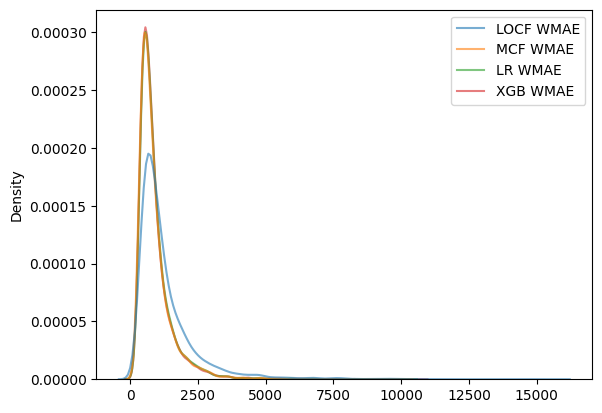

In [367]:
sns.kdeplot(intra_wmae_compare_df, alpha=0.6);

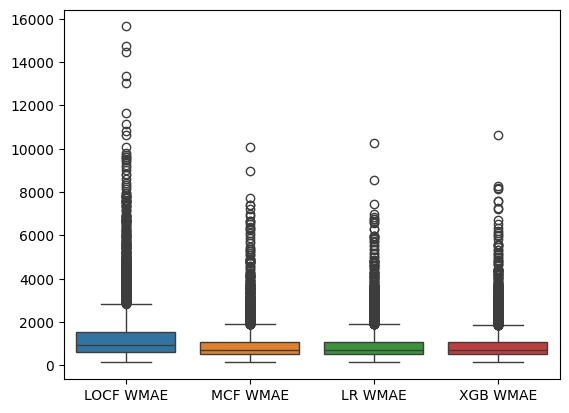

In [368]:
sns.boxplot(intra_wmae_compare_df);

In [369]:
intra_wmae_compare_df.mean().to_frame().rename(columns={0: "Mean WMAE"})

,Mean WMAE
LOCF WMAE,1298.838018
MCF WMAE,913.361220
LR WMAE,927.417463
XGB WMAE,915.707526


The best performing model is XGBoost with lowest mean WMAE, followed by MCF and linear regression.

## Interday Forecast Evaluation

In [370]:
inter_locf_resid_df, inter_locf_wmae = evaluate(y_test_inter, y_test_pred_inter_locf, test_weights, "interday")
inter_mcf_resid_df, inter_mcf_wmae = evaluate(y_test_inter, y_test_pred_inter_mcf, test_weights, "interday")
inter_lin_reg_resid_df, inter_lin_reg_wmae = evaluate(y_test_inter, y_test_pred_inter_lin, test_weights, "interday")
inter_xgb_resid_df, inter_xgb_wmae = evaluate(y_test_inter, y_test_pred_inter_xgb, test_weights, "interday")

In [371]:
inter_wmae_compare_df = pd.DataFrame()
inter_wmae_compare_df["LOCF WMAE"] = inter_locf_wmae
inter_wmae_compare_df["MCF WMAE"] = inter_mcf_wmae
inter_wmae_compare_df["LR WMAE"] = inter_lin_reg_wmae
inter_wmae_compare_df["XGB WMAE"] = inter_xgb_wmae

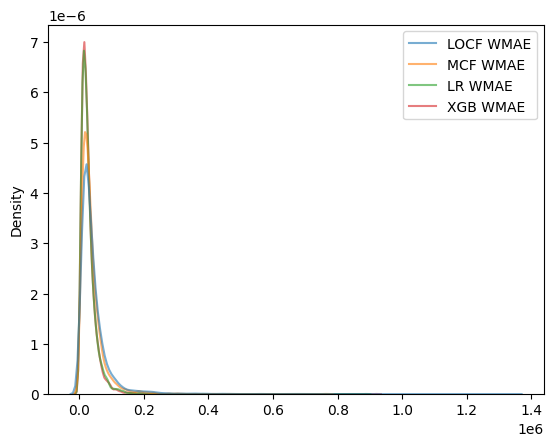

In [372]:
sns.kdeplot(inter_wmae_compare_df, alpha=0.6);

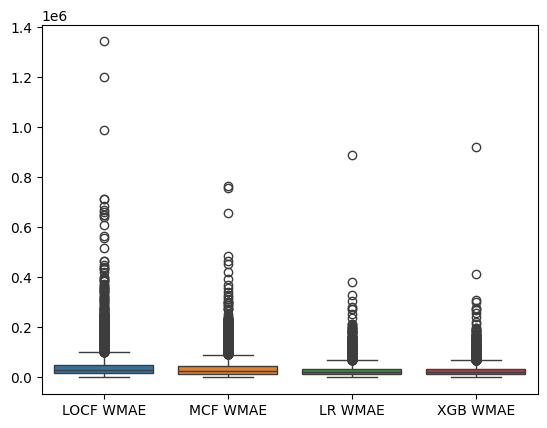

In [373]:
sns.boxplot(inter_wmae_compare_df);

In [374]:
inter_wmae_compare_df.mean().to_frame().rename(columns={0: "Mean WMAE"})

,Mean WMAE
LOCF WMAE,43370.393116
MCF WMAE,37497.093007
LR WMAE,28316.224648
XGB WMAE,27836.368738


For interday returns, the best performing model is still XGBoost. This time, however, the second best is linear regression.

## Error Analysis

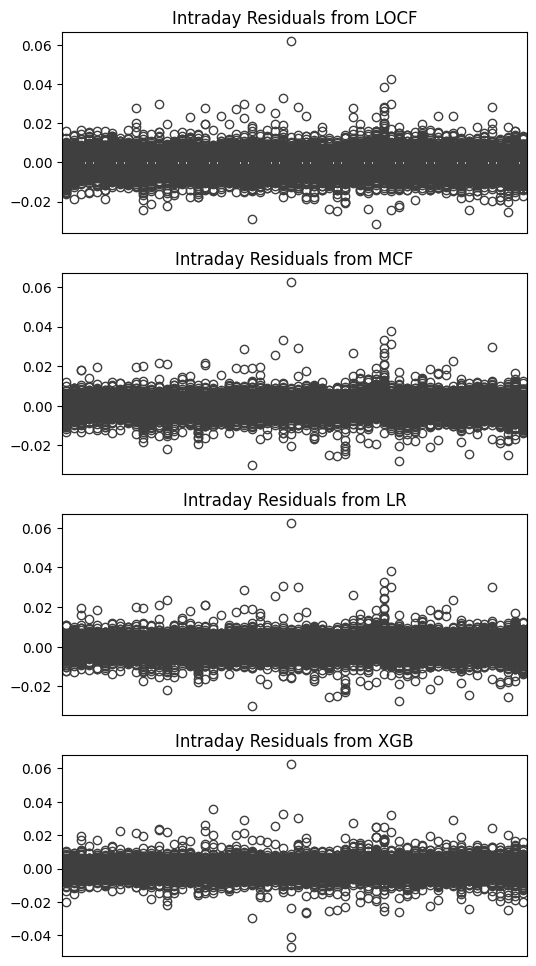

In [375]:
fig, axes = plt.subplots(4, 1, figsize=(6, 4 * 3))
sns.boxplot(intra_locf_resid_df, ax=axes[0])
axes[0].set_title("Intraday Residuals from LOCF")
axes[0].set_xticks([])
sns.boxplot(intra_mcf_resid_df, ax=axes[1])
axes[1].set_title("Intraday Residuals from MCF")
axes[1].set_xticks([])
sns.boxplot(intra_lin_reg_resid_df, ax=axes[2])
axes[2].set_title("Intraday Residuals from LR")
axes[2].set_xticks([])
sns.boxplot(intra_xgb_resid_df, ax=axes[3])
axes[3].set_title("Intraday Residuals from XGB")
axes[3].set_xticks([]);

From the visualization, no clear increment of residuals over time for intraday forecasts.

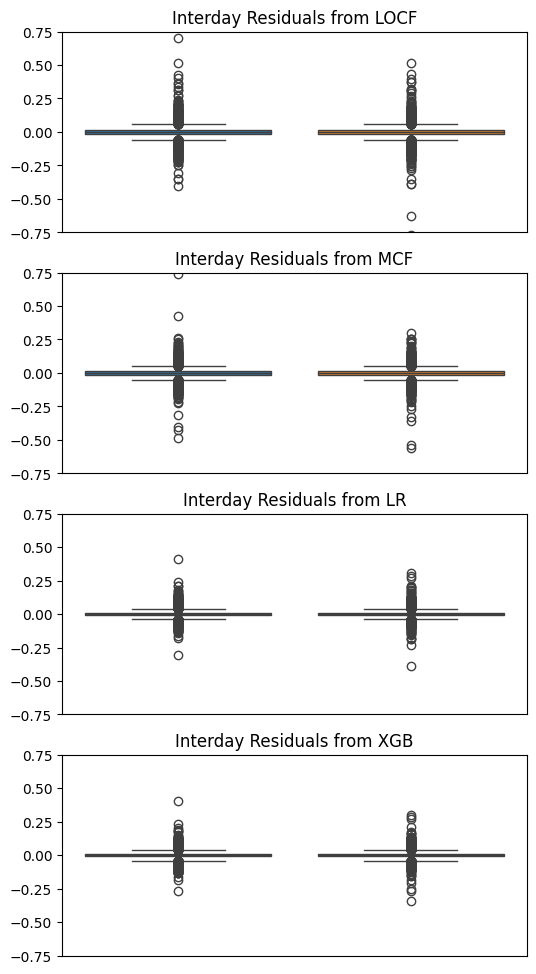

In [376]:
fig, axes = plt.subplots(4, 1, figsize=(6, 4 * 3))
sns.boxplot(inter_locf_resid_df, ax=axes[0])
axes[0].set_title("Interday Residuals from LOCF")
axes[0].set_xticks([])
axes[0].set_ylim(-0.75, 0.75)
sns.boxplot(inter_mcf_resid_df, ax=axes[1])
axes[1].set_title("Interday Residuals from MCF")
axes[1].set_xticks([])
axes[1].set_ylim(-0.75, 0.75)
sns.boxplot(inter_lin_reg_resid_df, ax=axes[2])
axes[2].set_title("Interday Residuals from LR")
axes[2].set_xticks([])
axes[2].set_ylim(-0.75, 0.75)
sns.boxplot(inter_xgb_resid_df, ax=axes[3])
axes[3].set_title("Interday Residuals from XGB")
axes[3].set_xticks([])
axes[3].set_ylim(-0.75, 0.75);

The same goes for interday forecasts.